## <strong>训练神经网络的主要流程：</strong>
<ol>
<li>带标签的数据准备</li>
<li>搭建对应的神经网络</li>
<li>设计损失函数</li>
<li>将图像转换成矩阵组成批（Batch），送入神经网络中，经过层层计算得到输出</li>
<li>将输出与其真值标签运用损失函数算出错误指标loss</li>
<li>对loss进行链式求导，反传到神经网络中，利用优化算法（例如梯度下降法）进行权重参数更新</li>
<li>训练到一定程度的时候，取另外一部分带标签的数据进行测试，可以得到错误率</li>
<li>观察训练和测试变化情况，判断是否有过拟合</li>
</ol>

## Tensor

In [20]:
import torch as t

#分配空间，但未初始化
print(t.empty(2,3))  
#在[0，1]均匀随机初始化
print(t.rand(2,3))

tensor([[0.0000e+00, 4.5915e-41, 3.2774e-09],
        [3.3236e-09, 2.7298e-06, 2.1252e-07]])
tensor([[0.2376, 0.8064, 0.3388],
        [0.9573, 0.5048, 0.9546]])


In [21]:
#获取tensor的形状类似np中的shape
print(t.rand(12,13).size())
print(t.rand(12,13).size()[1])
print(t.rand(12,13).size(1))


torch.Size([12, 13])
13
13


In [22]:
x,y=t.rand(2,3),t.rand(2,3)
z1=x+y
z2=t.add(x,y)
z3=t.Tensor(2,3)
t.add(x,y,out=z3)
print(z1,z2,z3)

z4=x.add(y)
print(x)
x.add_(y)
print(x)

tensor([[0.2848, 0.8623, 0.6844],
        [0.9169, 0.6611, 0.9560]]) tensor([[0.2848, 0.8623, 0.6844],
        [0.9169, 0.6611, 0.9560]]) tensor([[0.2848, 0.8623, 0.6844],
        [0.9169, 0.6611, 0.9560]])
tensor([[0.0054, 0.6688, 0.0171],
        [0.8195, 0.4806, 0.6280]])
tensor([[0.2848, 0.8623, 0.6844],
        [0.9169, 0.6611, 0.9560]])


## 切片

In [23]:
x=t.rand(3,4)
print(x)
print(x[:,2:4])#取3~4列，下标从0开始
print(x[0:2,:])#取1~2行
print(x[0:2,1:3])#取1~2行，2~3列相交的区域


tensor([[0.1803, 0.0475, 0.2940, 0.3578],
        [0.4756, 0.1480, 0.3587, 0.5743],
        [0.9686, 0.1916, 0.5525, 0.5126]])
tensor([[0.2940, 0.3578],
        [0.3587, 0.5743],
        [0.5525, 0.5126]])
tensor([[0.1803, 0.0475, 0.2940, 0.3578],
        [0.4756, 0.1480, 0.3587, 0.5743]])
tensor([[0.0475, 0.2940],
        [0.1480, 0.3587]])


In [24]:
import torch

In [25]:
x=torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [26]:
x.shape

torch.Size([12])

In [27]:
x.numel()

12

In [28]:
x=x.reshape(3,4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [29]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [30]:
import os
#写入
'''
r:	以只读方式打开文件。文件的指针将会放在文件的开头。这是**默认模式**。
rb: 以二进制格式打开一个文件用于只读。文件指针将会放在文件的开头。这是默认模式。
r+: 打开一个文件用于读写。文件指针将会放在文件的开头。
rb+:以二进制格式打开一个文件用于读写。文件指针将会放在文件的开头。
w:	打开一个文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。
wb:	以二进制格式打开一个文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。
w+:	打开一个文件用于读写。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。
wb+:以二进制格式打开一个文件用于读写。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。
a:	打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。也就是说，新的内容将会被写入到已有内容之后。如果该文件不存在，创建新文件进行写入。
ab:	以二进制格式打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。也就是说，新的内容将会被写入到已有内容之后。如果该文件不存在，创建新文件进行写入。
a+:	打开一个文件用于读写。如果该文件已存在，文件指针将会放在文件的结尾。文件打开时会是追加模式。如果该文件不存在，创建新文件用于读写。
ab+:以二进制格式打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。如果该文件不存在，创建新文件用于读写。
'''
os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file=os.path.join('..','data','house.csv')
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [31]:
import pandas as pd

data=pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [32]:
data

NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000

In [33]:
input,output=data.iloc[:,0:2],data.iloc[:,2]
input=input.fillna(input.mean())
input

NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN

In [34]:
#将input中类别值或离散值视为一个类别
input=pd.get_dummies(input,dummy_na=True)
input

NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1

In [35]:
x,y=torch.tensor(input.values),torch.tensor(output.values)
x,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [36]:
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [37]:
#找到一个地方存储梯度
x.requires_grad_(True) #等价于x=torch.arange(4.0,requires_grad=True)
x.grad

In [38]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [39]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [40]:
x.grad==4*x

tensor([True, True, True, True])

## 线性回归

In [41]:
import random
import torch
from d2l import torch as d2l

In [42]:
def synthetic_data(w,b,num_examples):
    #生成y=xw+b+噪声
    #均值为0方差为1的随机数，num_examples个样本，长度为len(w)
    x=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(x,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

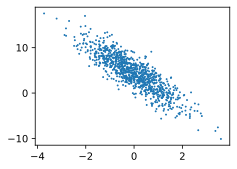

In [43]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [44]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(
            indices[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]
    
batch_size=10

for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    break

tensor([[ 0.8063, -0.5126],
        [ 0.2545,  0.0155],
        [ 0.5445,  0.2323],
        [ 0.2742, -0.8450],
        [-0.4702, -1.5878],
        [-0.1832, -0.2786],
        [-0.0343, -1.9490],
        [-0.9698,  1.6122],
        [ 1.1241,  0.5107],
        [ 0.4665, -1.2295]]) 
 tensor([[ 7.5438],
        [ 4.6537],
        [ 4.5050],
        [ 7.6330],
        [ 8.6594],
        [ 4.7888],
        [10.7452],
        [-3.2054],
        [ 4.7167],
        [ 9.3339]])


In [45]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [46]:
def linreg(x,w,b):
    #定义线性回归模型
    return torch.matmul(x,w)+b

In [47]:
def squsred_loss(y_hat,y):
    #均方误差
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [48]:
#定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [49]:
#训练
lr=0.03
num_epochs=3
net=linreg
loss=squsred_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        l=loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    
    with torch.no_grad():
        train_1=loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_1.mean()):f}')

epoch 1, loss 0.026830
epoch 2, loss 0.000092
epoch 3, loss 0.000051


In [50]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0002, -0.0006], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0007], grad_fn=<RsubBackward1>)


## 使用深度学习框架实现线性回归

In [51]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_b=4.2
true_w=torch.tensor([2,-3.4])
features,labels=d2l.synthetic_data(true_w,true_b,1000)

In [52]:
def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size=10
data_iter=load_array((features,labels),batch_size)
next(iter(data_iter))

[tensor([[-1.9952,  0.5087],
         [-0.0897,  0.4773],
         [-0.8912, -0.1436],
         [ 2.3205,  0.2236],
         [ 0.7031,  1.0615],
         [-1.4743,  0.2928],
         [ 0.3810,  0.0508],
         [ 1.3522,  0.8221],
         [-0.3446,  0.9978],
         [ 0.9913,  1.2298]]),
 tensor([[-1.5313],
         [ 2.4145],
         [ 2.9133],
         [ 8.0584],
         [ 2.0037],
         [ 0.2404],
         [ 4.7858],
         [ 4.1023],
         [ 0.1011],
         [ 1.9746]])]

In [53]:
from torch import nn

net=nn.Sequential(nn.Linear(2,1))


In [54]:
#初始化模型参数
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [55]:
#均方误差
loss=nn.MSELoss()

In [56]:
trainer=torch.optim.SGD(net.parameters(),lr=0.03)

In [57]:
num_epochs=3
for epoch in range(num_epochs):
    for x,y in data_iter:
        l=loss(net(x),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000192
epoch 2, loss 0.000103
epoch 3, loss 0.000102


## softmax回归

In [58]:
##读取数据集MNIST
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [59]:
trans=transforms.ToTensor()
mnist_train=torchvision.datasets.FashionMNIST(
    root="../data/",train=True,transform=trans,download=True
)
mnist_test=torchvision.datasets.FashionMNIST(
    root="../data/",train=False,transform=trans,download=True
)
len(mnist_train),len(mnist_test)

(60000, 10000)

In [60]:
mnist_train[0][0].shape


torch.Size([1, 28, 28])

In [61]:
def get_fashion_mnist_labels(labels):
    """返回数据集的文本标签"""
    text_labels=[
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]
    return [text_labels[int(i)] for i in labels]

def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    figsize=(num_cols*scale,num_rows*scale)
    _,axes=d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes=axes.flatten()
    for i,(ax,img)in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())

        else:
            ax.imshow(img)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

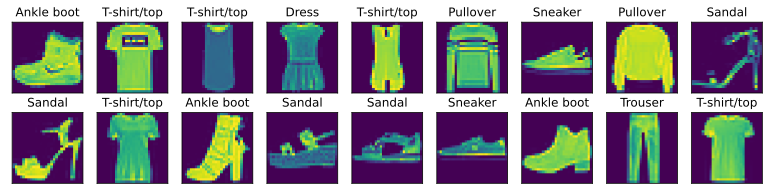

In [62]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [63]:
batch_size=256

def get_dataloader_workers():
    '''使用四个 进程来读取数据'''
    return 4

train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

timer=d2l.Timer()
for x,y in train_iter:
    continue
f'{timer.stop():.2f}sec'


'2.29sec'

In [64]:
def load_data_fashion_mnist(batch_size,resize=None):
    '''下载数据集加载到内存中'''
    trans=[transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans=transforms.Compose(trans)
    mnist_train=torchvision.datasets.FashionMNIST(
    root="../data/",train=True,transform=trans,download=True
)
    mnist_test=torchvision.datasets.FashionMNIST(
    root="../data/",train=False,transform=trans,download=True
)

    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                                num_workers=get_dataloader_workers()),
                data.DataLoader(mnist_test, batch_size, shuffle=False,
                                num_workers=get_dataloader_workers()))

train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## softmax回归从0开始实现

In [65]:
import torch
from IPython import display
from d2l import torch as d2l

#每次随机读取256张图片，返回训练集测试集的迭代器
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [66]:
#输入图像为（28*28）=784 数据集有十个类别，所以网络输出为十
num_inputs=784
num_outputs=10

w=torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b=torch.zeros(num_outputs,requires_grad=True)

In [67]:
x=torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
x.sum(0,keepdim=True),x.sum(1,keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [68]:
def softmax(x):
    x_exp=torch.exp(x)
    partition=x_exp.sum(1,keepdim=True)
    return x_exp/partition

In [69]:
x=torch.normal(0,1,(2,5))
x_prob=softmax(x)
x_prob,x_prob.sum(1)

(tensor([[0.1177, 0.0673, 0.2457, 0.1494, 0.4198],
         [0.1546, 0.3929, 0.1677, 0.2360, 0.0487]]),
 tensor([1.0000, 1.0000]))

In [70]:
def net(x):
    return softmax(torch.matmul(x.reshape((-1,w.shape[0])),w)+b)

In [71]:
y=torch.tensor([0,2])
y_hat=torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]

tensor([0.1000, 0.5000])

In [72]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

In [73]:
#预测类别与真实y元素进行比较

def accuracy(y_hat,y):
    '''计算预测正确的数量'''
    if len(y_hat.shape)>1 and y_hat.shape[1]>1:
        y_hat=y_hat.argmax(axis=1)
    cmp=y_hat.type(y.dtype)==y
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat,y)/len(y)

0.5

In [74]:
def evaluate_accuracy(net,data_iter):
    '''计算在指定数据集上模型的精度'''
    if isinstance(net,torch.nn.Module):
        net.eval() #将模型设置为评估模式
    metric=Accumulator(2) #正确预测数，预测总数
    for x,y in data_iter:
        metric.add(accuracy(net(x),y),y.numel())
    return metric[0]/metric[1]

In [75]:
class Accumulator:  
    """在`n`个变量上累加。"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

evaluate_accuracy(net, test_iter)

0.1078

In [76]:
def train_epoch_ch3(net,train_iter,loss,updater):
    if isinstance(net,torch.nn.Module):
        net.train()
    metric=Accumulator(3)
    for x,y in train_iter:
        y_hat=net(x)
        l=loss(y_hat,y)
        if isinstance(updater,torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(
                float(1)*len(y),accuracy(y_hat,y),y.size().numel()
            )
        else:
            l.sum().backward()
            updater(x.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

In [77]:
class Animator:  
    """在动画中绘制数据。"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [119]:
def train_ch3(net,train_iter,test_iter,loss,num_epochs,updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 2],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics=train_epoch_ch3(net,train_iter,loss,updater)
        test_acc=evaluate_accuracy(net,test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics

    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [79]:
lr=0.1
def updater(batch_size):
    return d2l.sgd([w,b],lr,batch_size)

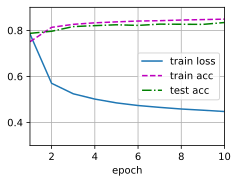

In [80]:
num_epochs=10
train_ch3(net,train_iter,test_iter,cross_entropy,num_epochs,updater)

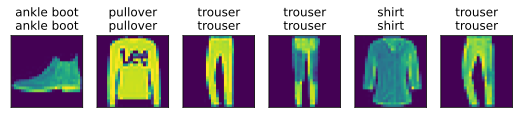

In [81]:
def predict_ch3(net, test_iter, n=6):  
    """预测标签（定义见第3章）。"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

## softmax回归简洁实现

In [120]:
import torch
from torch import nn
from torch.nn import init
import numpy as np

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [121]:
net=nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weight(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)

net.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [122]:
loss=nn.CrossEntropyLoss()

In [123]:
trainer=torch.optim.SGD(net.parameters(),lr=0.1)

AssertionError: 1.0

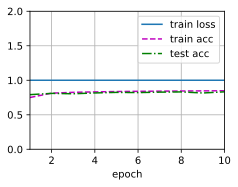

In [124]:
num_epochs=10
#d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)
train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

## 感知机

In [3]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [4]:
num_inputs,num_outputs,num_hiddens=784,10,256

w1=nn.Parameter(
    torch.rand(num_inputs,num_hiddens,requires_grad=True)
)
b1=nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
w2=nn.Parameter(
    torch.randn(num_hiddens,num_outputs,requires_grad=True)
)
b2=nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params=[w1,b1,w2,b2]

In [5]:
#实现ReLU激活函数
def relu(x):
    a=torch.zeros_like(x)
    return torch.max(x,a)

In [6]:
#实现模型
def net(x):
    x=x.reshape((-1,num_inputs))
    H=relu(x@w1+b1)
    return (H@w2+b2)
loss=nn.CrossEntropyLoss()

KeyboardInterrupt: 

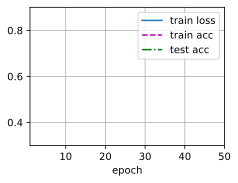

In [8]:
num_epochs,lr=50,0.1
updater=torch.optim.SGD(params,lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)

In [ ]:
#多层感知机简洁实现
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10))
def init_weight(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

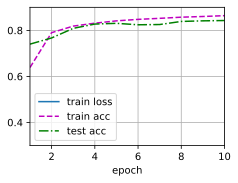

In [10]:
batch_size,lr,num_epochs = 256,0.1,10
loss=nn.CrossEntropyLoss()
trainer=torch.optim.SGD(net.parameters(),lr=lr)
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

## 过拟合欠拟合
<Li>训练误差：模型在训练数据上的误差</Li>
<li>泛化误差：模型在新数据上的误差</li>
<li>非大数据集上通常使用K-折交叉验证</li>

In [1]:
import math
import numpy as np
import torch 
from torch import nn
from d2l import torch as d2l


In [5]:
max_degree=20
n_train,n_test=100,100
true_w=np.zeros(max_degree)
true_w[0:4]=np.array([5,1.2,-3.4,5.6])

features=np.random.normal(size=(n_train+n_test,1))

np.random.shuffle(features)
poly_features=np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:,i]/=math.gamma(i+1)
labels=np.dot(poly_features,true_w)
labels+=np.random.normal(scale=0.1,size=labels.shape)

In [6]:
true_w,features,poly_features,labels=[
    torch.tensor(x,dtype=torch.float32)
    for x in [true_w,features,poly_features,labels]
]
features[:2],poly_features[:2,:],labels[:2]

(tensor([[-0.9468],
         [ 0.8741]]),
 tensor([[ 1.0000e+00, -9.4675e-01,  4.4817e-01, -1.4144e-01,  3.3476e-02,
          -6.3387e-03,  1.0002e-03, -1.3528e-04,  1.6009e-05, -1.6841e-06,
           1.5944e-07, -1.3723e-08,  1.0827e-09, -7.8849e-11,  5.3322e-12,
          -3.3655e-13,  1.9914e-14, -1.1091e-15,  5.8334e-17, -2.9067e-18],
         [ 1.0000e+00,  8.7410e-01,  3.8203e-01,  1.1131e-01,  2.4324e-02,
           4.2523e-03,  6.1949e-04,  7.7357e-05,  8.4523e-06,  8.2090e-07,
           7.1755e-08,  5.7019e-09,  4.1534e-10,  2.7927e-11,  1.7436e-12,
           1.0161e-13,  5.5509e-15,  2.8542e-16,  1.3860e-17,  6.3764e-19]]),
 tensor([1.6384, 5.5309]))

In [13]:
def evaluate_loss(net,data_iter,loss):
    '''评估给定数据集上模型的损失'''
    metric=d2l.Accumulator(2)
    for x,y in data_iter:
        out=net(x)
        y=y.reshape(out.shape)
        l=loss(out,y)
        metric.add(l.sum(),l.numel())
    return metric[0] / metric[1]

In [14]:
def train(train_features,test_features,train_labels,test_labels,num_epochs=400):
    loss=nn.MSELoss()
    input_shape=train_features.shape[-1]
    net=nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size=min(10,train_labels.shape[0])
    train_iter=d2l.load_array((train_features,train_labels.reshape(-1,1)),batch_size)
    test_iter=d2l.load_array((test_features,test_labels.reshape(-1,1)),batch_size,is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator=d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 5.019609   1.2529211 -3.3782008  5.4759727]]


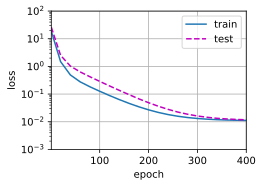

In [20]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

## 欠拟合

weight: [[3.8421075 3.620315 ]]


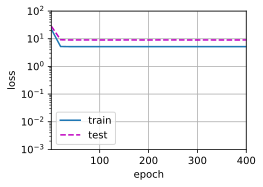

In [16]:

train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

## 过拟合

weight: [[ 4.9800696   1.3083102  -3.1257784   5.1276493  -0.7952132   1.4192972
   0.0676764   0.12348592  0.06689154 -0.06001757  0.01351086 -0.19899106
   0.15404944  0.0285813  -0.09788799  0.0107201  -0.01941501 -0.09037335
  -0.18214966  0.03446457]]


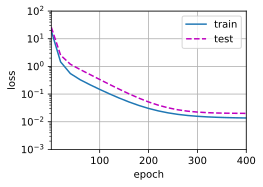

In [21]:
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:])

## 权重衰退

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [26]:
n_train,n_test,num_inputs,batch_size=20,100,200,5
true_w,true_b=torch.ones((num_inputs,1))*0.01,0.05
train_data=d2l.synthetic_data(true_w,true_b,n_train)
train_iter=d2l.load_array(train_data,batch_size)
test_data=d2l.synthetic_data(true_w,true_b,n_test)
test_iter=d2l.load_array(test_data,batch_size,is_train=False)

In [27]:
#初始化模型参数
def init_params():
    w=torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b=torch.zeros(1,requires_grad=True)  
    return [w,b]

In [28]:
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

In [29]:
def train(lambd):
    w,b=init_params()
    net,loss=lambda x: d2l.linreg(x, w, b), d2l.squared_loss
    num_epochs,lr=100,0.003
    animator=d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for x,y in train_iter:
            #with torch.enable_grad():
            l=loss(net(x),y+lambd*l2_penalty(w))
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if(epoch+1)%5==0:
            animator.add(epoch+1,(d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.37199878692627


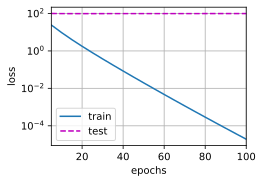

In [20]:
train(lambd=0)

w的L2范数是： nan


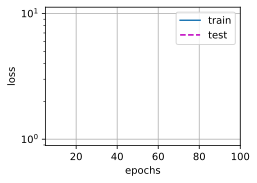

In [30]:
train(lambd=3)

In [31]:
#简洁实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        'weight_decay': wd}, {
            "params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.831387519836426


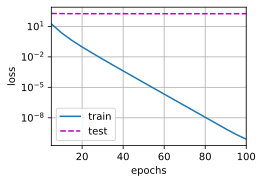

In [32]:
train_concise(0)

w的L2范数： 0.3787805140018463


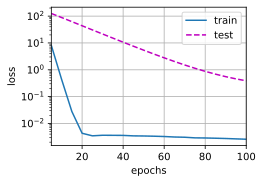

In [33]:
train_concise(3)

## Dropout

In [46]:
def dropout_layer(x,dropout):
    assert 0<=dropout<=1
    if dropout ==1:
        return torch.zeros_like(x)
    if dropout ==0:
        return x
    mask=(torch.rand(x.shape)>dropout).float()
    return mask*x/(1.0-dropout)

In [47]:
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  4.,  6.,  8., 10., 12., 14.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 28., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [50]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

dropout1, dropout2 = 0.0, 0.0

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        if self.training == True:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

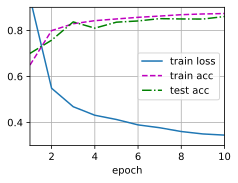

In [49]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = torch.nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

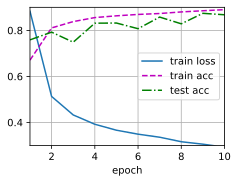

In [51]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = torch.nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [52]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
                    nn.Dropout(dropout1), nn.Linear(256, 256), nn.ReLU(),
                    nn.Dropout(dropout2), nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

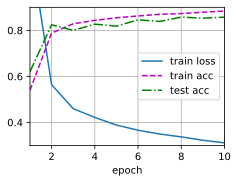

In [53]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [68]:
#房价预测
import hashlib
import os
import tarfile
import zipfile
import requests
DATA_HUB=dict()
DATA_URL='http://d2l-data.s3-accelerate.amazonaws.com/'


In [69]:
def download(name, cache_dir=os.path.join('..', 'data')):  
    """下载一个DATA_HUB中的文件，返回本地文件名。"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}."
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

def download_extract(name, folder=None):  
    """下载并解压zip/tar文件。"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩。'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  
    """下载DATA_HUB中的所有文件。"""
    for name in DATA_HUB:
        download(name)

In [70]:

import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

DATA_HUB['kaggle_house_train'] = (  
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (  
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [71]:
print(train_data.iloc[0:4],[0,1,2,3,-3,-2,-1])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml  

In [72]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [89]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 331 entries, MSSubClass to SaleCondition_nan
dtypes: float64(36), uint8(295)
memory usage: 1.6 MB


In [73]:
#将所有缺失的值替换为相应特征的平均值，通过将特征重新缩放到零均值和单位方差来标准化数据
numeric_features=all_features.dtypes[all_features.dtypes!='object'].index
all_features[numeric_features]=all_features[numeric_features].apply(
    lambda x:(x-x.mean())/(x.std())
)
all_features[numeric_features]=all_features[numeric_features].fillna(0)

In [74]:
all_features=pd.get_dummies(all_features,dummy_na=True)
all_features.shape

(2919, 331)

In [90]:
n_train

1460

In [75]:
n_train=train_data.shape[0]
train_features=torch.tensor(all_features[:n_train].values,dtype=torch.float32)
test_features=torch.tensor(all_features[n_train:].values,dtype=torch.float32)
train_labels=torch.tensor(train_data.SalePrice.values.reshape(-1,1),dtype=torch.float32)

In [82]:

loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    net = nn.Sequential(nn.Linear(in_features, 1))
    return net

In [83]:
def log_rmse(net,features,labels):
    clipped_preds=torch.clamp(net(features),1,float('inf'))
    rmse=torch.sqrt(loss(torch.log(clipped_preds),torch.log(labels)))
    return rmse.item()

In [84]:
def train(net,train_features,train_labels,test_features,test_labels,num_epochs,lr,weight_decay,batch_size):
    train_ls,test_ls=[],[]
    train_iter=d2l.load_array((train_features,train_labels),batch_size)
    optimizer=torch.optim.Adam(net.parameters(),lr=lr,weight_decay=weight_decay)
    for epoch in range(num_epochs):
        for x,y in train_iter:
            optimizer.zero_grad()
            l=loss(net(x),y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [85]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [86]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

fold 1, train log rmse 0.170650, valid log rmse 0.156703
fold 2, train log rmse 0.162056, valid log rmse 0.190882
fold 3, train log rmse 0.163636, valid log rmse 0.168099
fold 4, train log rmse 0.167856, valid log rmse 0.154603
fold 5, train log rmse 0.163061, valid log rmse 0.182962
5-折验证: 平均训练log rmse: 0.165452, 平均验证log rmse: 0.170650


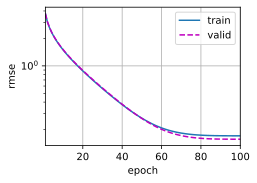

In [87]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

train log rmse 0.162355


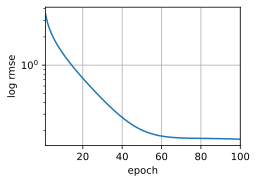

In [88]:
def train_and_pred(train_features, test_feature, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'train log rmse {float(train_ls[-1]):f}')
    preds = net(test_features).detach().numpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

## 模型构造

In [2]:
import torch
from torch import nn
from torch.nn import functional as F

net=nn.Sequential(nn.Linear(20,256),nn.ReLU(),nn.Linear(256,10))

x=torch.rand(2,20)
net(x)


tensor([[ 0.1911,  0.0005, -0.0566, -0.0088,  0.1164,  0.0131,  0.0364,  0.0140,
          0.0244, -0.1487],
        [ 0.2344, -0.0672, -0.0493,  0.0530,  0.1609,  0.1759,  0.1127,  0.0598,
          0.0928, -0.1453]], grad_fn=<AddmmBackward0>)

In [4]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden=nn.Linear(20,256)
        self.out=nn.Linear(256,10)

    def forward(self,x):
        return self.out(F.relu(self.hidden(x)))

In [5]:
net=MLP()
net(x)

tensor([[ 0.0315,  0.0080, -0.0705, -0.2440, -0.2182, -0.3516, -0.3980, -0.0015,
         -0.0651,  0.1367],
        [ 0.0679, -0.1958, -0.0813, -0.2062, -0.3716, -0.4076, -0.2126,  0.0313,
         -0.0186,  0.1027]], grad_fn=<AddmmBackward0>)

In [6]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for block in args:
            self._modules[block] = block

    def forward(self, X):
        for block in self._modules.values():
            X = block(X)
        return X

net = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))
net(x)

tensor([[ 0.0221,  0.0509, -0.1786,  0.0451,  0.0042, -0.2098,  0.1335, -0.1498,
          0.2220, -0.1909],
        [ 0.0584, -0.0416, -0.1067, -0.0290, -0.0533, -0.2132,  0.0942, -0.1183,
          0.1146, -0.2190]], grad_fn=<AddmmBackward0>)

In [7]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.rand_weight=torch.rand((20,20),requires_grad=False)
        self.liner=nn.Linear(20,20)

    def forward(self,x):
        x=self.liner(x)
        x=F.relu(torch.mm(x,self.rand_weight)+1)
        x=self.liner(x)
        while x.abs().sum()>1:
            x/=2
        return x.sum()
    
net=FixedHiddenMLP()
net(x)

tensor(-0.1925, grad_fn=<SumBackward0>)

In [12]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net=nn.Sequential(nn.Linear(20,64),nn.ReLU(),
                                nn.Linear(64,32),nn.ReLU()
        )
        self.linear=nn.Linear(32,16)
    def forward(self,x):
        return self.linear(self.net(x))

chimera=nn.Sequential(NestMLP(),nn.Linear(16,20),FixedHiddenMLP())
chimera(x)

tensor(-0.0638, grad_fn=<SumBackward0>)

## 参数管理

In [1]:
import torch 
from torch import nn

net=nn.Sequential(nn.Linear(4,8),nn.ReLU(),nn.Linear(8,1))
x=torch.rand(size=(2,4))
net(x)

tensor([[0.4576],
        [0.4572]], grad_fn=<AddmmBackward0>)

In [2]:
print(net[2].state_dict())

OrderedDict([('weight', tensor([[ 0.0994,  0.1486, -0.1720,  0.3097,  0.3315,  0.0522,  0.2362,  0.0880]])), ('bias', tensor([0.2034]))])


In [3]:
net[2].weight.grad==None

True

In [4]:
def block1():
    return nn.Sequential(nn.Linear(4,8),nn.ReLU(),nn.Linear(8,4),nn.ReLU())

def block2():
    net=nn.Sequential()
    for i in range(4):
        net.add_module(f'block{i}',block1())
    return net

rgnet=nn.Sequential(block2(),nn.Linear(4,1))
rgnet(x)

tensor([[0.4498],
        [0.4498]], grad_fn=<AddmmBackward0>)

In [5]:
print(rgnet)

Sequential(
  (0): Sequential(
    (block0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


In [6]:
def init_norm(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,mean=0,std=0.01)
        nn.init.zeros_(m.bias)

net.apply(init_norm)
net[0].weight.data[0],net[0].bias.data[0]

(tensor([ 0.0042, -0.0029,  0.0022, -0.0008]), tensor(0.))

In [8]:
def init_constant(m):
    if type(m)==nn.Linear:
        nn.init.constant_(m.weight,1)
        nn.init.zeros_(m.bias)

net.apply(init_constant)
net[0].weight.data[0],net[0].bias.data[0]

(tensor([1., 1., 1., 1.]), tensor(0.))

In [10]:
def xavier(m):
    if type(m)==nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def init_42(m):
    if type(m)==nn.Linear:
        nn.init.constant_(m.weight,42)


net[0].apply(xavier)
net[2].apply(init_42)
print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([ 0.3794,  0.5191, -0.0856, -0.0677])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


In [11]:
def my_init(m):
    if type(m)==nn.Linear:
        print(
            "Init",
            *[(name,param.shape) for name,param in m.named_parameters()][0]
        )
        nn.init.uniform_(m.weight,-10,10)
        m.weight.data *=m.weight.data.abs()>=5

net.apply(my_init)
net[0].weight[:2]

Init weight torch.Size([8, 4])
Init weight torch.Size([1, 8])


tensor([[ 0.0000, -8.1201, -6.2738, -0.0000],
        [-6.6116, -0.0000, -0.0000, -6.9367]], grad_fn=<SliceBackward0>)

In [12]:
shared=nn.Linear(8,8)
net=nn.Sequential(nn.Linear(4,8),nn.ReLU(),shared,nn.ReLU(),shared,nn.ReLU(),nn.Linear(8,1))

net(x)
print(net[2].weight.data[0]==net[4].weight.data[0])
net[2].weight.data[0,0]=100
print(net[2].weight.data[0]==net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])
tensor([True, True, True, True, True, True, True, True])


## 自定义层

In [13]:
import torch
import torch.nn.functional as F
from torch import nn

In [14]:
class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self,x):
        return x-x.mean()

layer=CenteredLayer()
layer(torch.FloatTensor([1,2,3,4,5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [15]:
#将层作为组件合并到构建更复杂的模型中
net =nn.Sequential(nn.Linear(8,128),CenteredLayer())

y=net(torch.rand(4,8))
y.mean()

tensor(3.7253e-09, grad_fn=<MeanBackward0>)

In [16]:
class MyLinear(nn.Module):
    def __init__(self,in_units,units):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(in_units,units))
        self.bias=nn.Parameter(torch.randn(units,))


    def forward(self,x):
        linear=torch.matmul(x,self.weight.data)+self.bias.data
        return F.relu(linear)
dense=MyLinear(5,3)
dense.weight

Parameter containing:
tensor([[ 1.7441,  1.0254,  0.3072],
        [ 1.5954,  0.0982,  0.6011],
        [ 0.0640, -1.5184,  0.6594],
        [-0.2816,  1.1905,  0.0366],
        [-0.3889,  0.1151, -1.7181]], requires_grad=True)

In [17]:
#使用自定义层直接执行正向传播计算
dense(torch.rand(2,5))

tensor([[2.8092, 0.3353, 1.0283],
        [2.2825, 0.0000, 0.4357]])

In [18]:
# 使用自定义层构建模型
net=nn.Sequential(MyLinear(64,8),MyLinear(8,1))
net(torch.rand(2,64))

tensor([[0.],
        [0.]])

## 读取文件

In [20]:
#加载和保存张量

x=torch.arange(4)
torch.save(x,'./x-file')

x2=torch.load('./x-file')
x2

tensor([0, 1, 2, 3])

In [23]:
#存储一个张量列表，然后把它们读回内存
y=torch.zeros(4)
torch.save([x,y],'./x-files')
x2,y2=torch.load('./x-files')
(x2,y2)

(tensor([0, 1, 2, 3]), tensor([0., 0., 0., 0.]))

In [24]:
# 写入或读取字符串映射到张量的字典
mydict={'x':x,'y':y}
torch.save(mydict,'mydict')
mydict2=torch.load('mydict')
mydict2

{'x': tensor([0, 1, 2, 3]), 'y': tensor([0., 0., 0., 0.])}

In [26]:
#加载保存模型参数
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden=nn.Linear(20,256)
        self.output=nn.Linear(256,10)

    def forward(self,x):
        return self.output(F.relu(self.hidden(x)))


net=MLP()
x=torch.rand(size=(2,20))
y=net(x)

In [27]:
#将模型参数保存
torch.save(net.state_dict(),'./mlp.params')

In [28]:
clone=MLP()
clone.load_state_dict(torch.load('./mlp.params'))
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [29]:
y_clone=clone(x)
y_clone==y

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [30]:
!nvidia-smi

Fri Nov 18 11:33:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 517.00       Driver Version: 517.00       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   48C    P5    22W /  N/A |   1425MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
import torch
from torch import nn

torch.device('cpu'),torch.cuda.device('cuda')

(device(type='cpu'), <torch.cuda.device at 0x17ccb7def70>)

In [34]:
torch.cuda.device_count()

1

In [35]:
def try_gpu(i=0):  
    """如果存在，则返回gpu(i)，否则返回cpu()。"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():  
    """返回所有可用的GPU，如果没有GPU，则返回[cpu(),]。"""
    devices = [
        torch.device(f'cuda:{i}') for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

try_gpu(), try_gpu(10), try_all_gpus()

(device(type='cuda', index=0),
 device(type='cpu'),
 [device(type='cuda', index=0)])

In [36]:
x=torch.tensor([1,2,3])
x.device

device(type='cpu')

In [40]:
x=torch.ones(2,3,device='cuda')
x

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [41]:
y=torch.ones(2,3,device=try_gpu())
y

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [42]:
net=nn.Sequential(nn.Linear(3,1))
net=net.to(device='cuda')
net(x)

tensor([[0.8468],
        [0.8468]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [43]:
net[0].weight.data.device

device(type='cuda', index=0)

# <font color='red' face="STCAIYUN">卷积</font>

## 互相关运算

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

def corr2d(x,k):
    h,w=k.shape
    y=torch.zeros((x.shape[0]-h+1,x.shape[1]-w+1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i,j]=(x[i:i+h,j:j+w]*k).sum()
    return y

## 验证上述互相关的运算的输出

In [2]:
x=torch.tensor([[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]])
k=torch.tensor([[0.0,1.0],[2.0,3.0]])
corr2d(x,k)

tensor([[19., 25.],
        [37., 43.]])

## 实现二维卷积层

In [3]:
class Conv2D(nn.Module):
    def __init__(self,kernel_size):
        super().__init__()
        self.weight=nn.Parameter(torch.rand(kernel_size))
        self.bias=nn.Parameter(torch.zeros(1))

    def forward(self,x):
        return corr2d(x,self.weight)+self.bias

## 卷积层的一个简单应用：检测图像中不同颜色的边缘

In [5]:
x=torch.ones((6,8))
x[:,2:6]=0
x

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [6]:
k=torch.tensor([[1.0,-1.0]])

## 输出y中的1代表白色到黑色的边缘，-1代表黑色到白色的边缘

In [7]:
y=corr2d(x,k)
y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

## 学习由x生成y的卷积核

In [9]:
conv2d=nn.Conv2d(1,1,kernel_size=(1,2),bias=False)

x=x.reshape((1,1,6,8))
y=y.reshape((1,1,6,7))

for i in range(10):
    y_hat=conv2d(x)
    l=(y_hat-y)**2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:]-=3e-2*conv2d.weight.grad
    if(i+1)%2==0:
        print(f'batch{i+1},loss{l.sum():.3f}')


batch2,loss6.315
batch4,loss1.147
batch6,loss0.228
batch8,loss0.053
batch10,loss0.015


## 所学的卷积核的权重张量

In [10]:
conv2d.weight.data.reshape((1,2))

tensor([[ 0.9769, -0.9978]])

## 填充和步幅

In [1]:
import torch
from torch import nn

def comp_conv2d(conv2d,x):
    x=x.reshape((1,1)+x.shape)
    y=conv2d(x)
    return y.reshape(y.shape[2:])


conv2d=nn.Conv2d(1,1,kernel_size=3,padding=1)
x=torch.rand(size=(8,8))
comp_conv2d(conv2d,x).shape

torch.Size([8, 8])

In [2]:
conv2d=nn.Conv2d(1,1,kernel_size=(5,3),padding=(2,1))
comp_conv2d(conv2d,x).shape

torch.Size([8, 8])

In [5]:
#步幅为2
conv2d=nn.Conv2d(1,1,kernel_size=3,padding=1,stride=2)
comp_conv2d(conv2d,x).shape

torch.Size([4, 4])

In [6]:
conv2d=nn.Conv2d(1,1,kernel_size=(3,5),padding=(0,1),stride=(3,4))
comp_conv2d(conv2d,x).shape

torch.Size([2, 2])

# 多输入多输出通道

每个通道都有一个卷积核，结果是所有通道卷积结果的和

In [1]:
#实现多输入通道的互相关运算
import torch
from d2l import torch as d2l

def corr2d_multi_in(x,k):
    return sum(d2l.corr2d(x,k) for x,k in zip(x,k))

In [5]:
x = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
                  [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
k = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(x, k)

tensor([[ 56.,  72.],
        [104., 120.]])

In [6]:
#计算多个通道的输出的互相关函数
def corr2d_multi_in_out(x,k):
    return torch.stack([corr2d_multi_in(x,k) for k in k],0)

k=torch.stack((k,k+1,k+2),0)
k.shape

torch.Size([3, 2, 2, 2])

In [7]:
corr2d_multi_in_out(x,k)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [8]:
def corr2d_multi_in_out_1x1(x,k):
    c_i,h,w=x.shape
    c_o=k.shape[0]
    x=x.reshape((c_i,h*w))
    k=k.reshape((c_o,c_i))
    y=torch.matmul(k,x)
    return y.reshape((c_o,h,w))

X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

# 实现池化层的正向传播

In [9]:
def pool2d(x,pool_size,mode='max'):
    p_h,p_w=pool_size
    y=torch.zeros((x.shape[0]-p_h+1,x.shape[1]-p_w+1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            if mode=='max':
                y[i,j]=x[i:i+p_h,j:j+p_w].max()
            elif mode=='avg':
                y[i,j]=x[i:i+p_h,j:j+p_w].mean()
    return y

In [10]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [13]:
X

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [11]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [14]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [18]:
import torch.nn as nn

In [19]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [20]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [21]:
pool2d = nn.MaxPool2d((2, 3), padding=(1, 1), stride=(2, 3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

# 池化层在每个输入通道上单独运算

In [22]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [23]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

# LeNet实现

In [36]:
import torch
from torch import _nnpack_available
from d2l import torch as d2l

class Reshape(torch.nn.Module):
    def forward(self,x):
        return x.view(-1,1,28,28)
    
net=torch.nn.Sequential(
    Reshape(),
    nn.Conv2d(1,6,kernel_size=5,padding=2),nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Conv2d(6,16,kernel_size=5),nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),nn.Flatten(),
    nn.Linear(16*5*5,120),nn.Sigmoid(),
    nn.Linear(120,84),nn.Sigmoid(),
    nn.Linear(84,10)
)

# 检查模型

In [37]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Reshape output shape: 	 torch.Size([1, 1, 28, 28])
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


# LeNet在Fashion—MNIST数据集上的表现

In [38]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size=batch_size)

In [39]:
def evaluate_accuracy_gpu(net,data_iter,device=None):
    if isinstance(net,torch.nn.Module):
        net.eval()
        if not device:
            device=next(iter(net.parameters())).device

    metric=d2l.Accumulator(2)
    for x,y in data_iter:
        if isinstance(x,list):
            x=[x.to(device) for x in x]
        else:
            x=x.to(device)
        y=y.to(device)
        metric.add(d2l.accuracy(net(x),y),y.numel()) 

    return metric[0]/metric[1]   


In [40]:
def train_ch6(net,train_iter,test_iter,num_epochs,lr,device):
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 0.469, train acc 0.824, test acc 0.794
68260.7 examples/sec on cuda:0


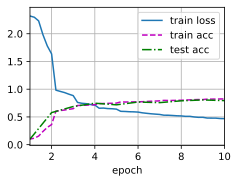

In [41]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# AlexNet

In [46]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 10))

In [47]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

In [48]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

loss 0.328, train acc 0.881, test acc 0.877
1932.9 examples/sec on cuda:0


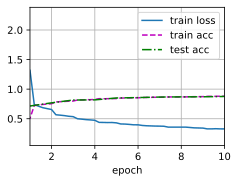

In [49]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# VGG

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convc,in_channels,out_channels):
    layers=[]
    for _ in range(num_convc):
        layers.append(
            nn.Conv2d(
                in_channels,out_channels,kernel_size=3,padding=1
            )
        )
        layers.append(nn.ReLU())
        in_channels=out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [4]:
conv_arch=((1,64),(1,128),(2,256),(2,512),(2,512))

def vgg(conv_arch):
    conv_blks=[]
    in_channels=1
    for(num_convs,out_channels) in conv_arch:
        conv_blks.append(vgg_block(
            num_convs,in_channels,out_channels
        ))
        in_channels=out_channels

    return nn.Sequential(
        *conv_blks,nn.Flatten(),
        nn.Linear(out_channels*7*7,4096),nn.ReLU(),
        nn.Dropout(0.5),nn.Linear(4096,4096),nn.ReLU(),
        nn.Dropout(0.5),nn.Linear(4096,10)
    )    


net = vgg(conv_arch)

In [5]:
x=torch.randn(size=(1,1,224,224))
for blk in net:
    x=blk(x)
    print(blk.__class__.__name__, 'output shape:\t', x.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [6]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

loss 0.180, train acc 0.934, test acc 0.924
1213.4 examples/sec on cuda:0


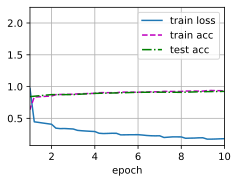

In [7]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# NiN

In [8]:
def nin_block(in_channels,out_channels,kernel_size,strides,padding):
    return nn.Sequential(
        nn.Conv2d(in_channels,out_channels,kernel_size,strides,padding),
        nn.ReLU(),nn.Conv2d(out_channels,out_channels,kernel_size=1),
        nn.ReLU(),nn.Conv2d(out_channels,out_channels,kernel_size=1),
        nn.ReLU()
    )

In [9]:
net=nn.Sequential(
    nin_block(1,96,kernel_size=11,strides=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block(96,256,kernel_size=5,strides=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block(256,384,kernel_size=3,strides=1,padding=1),
    nn.MaxPool2d(3,stride=2),nn.Dropout(0.5),
    nin_block(384,10,kernel_size=3,strides=1,padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten()
)

In [10]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.358, train acc 0.868, test acc 0.871
1657.9 examples/sec on cuda:0


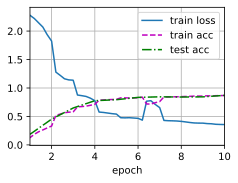

In [11]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# inception块

In [12]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

class Inception(nn.Module):
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        return torch.cat((p1, p2, p3, p4), dim=1)

In [13]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2,
                                           padding=1))

b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1), nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten())

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))

In [14]:
X = torch.rand(size=(1, 1, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


loss 0.252, train acc 0.903, test acc 0.895
1961.5 examples/sec on cuda:0


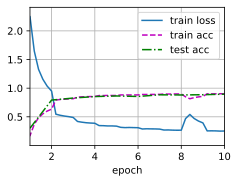

In [15]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# batchnotmalization

In [16]:
def batch_norm(x,gamma,beta,moving_mean,moving_var,eps,momentum):
    if not torch.is_grad_enabled():
        x_hat=(x-moving_mean)/torch.sqrt(moving_var+eps)
    else:
        assert len(x.shape) in (2,4)
        if len(x.shape)==2:
            mean=x.mean(dim=0)
            var=((x-mean)**2).mean(dim=0)
        else:
            mean=x.mean(dim=(0,2,3),keepdim=True)
            var=((x-mean)**2).mean(dim=(0,2,3),keepdim=True)
        x_hat=(x-mean)/torch.sqrt(var+eps)
        moving_mean=momentum*moving_mean+(1.0-momentum)*mean
        moving_var=momentum*moving_var+(1.0-momentum)*var
    y=gamma*x_hat+beta

    return y,moving_mean.data,moving_var.data

In [17]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean, self.moving_var,
            eps=1e-5, momentum=0.9)
        return Y

In [18]:
net = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4),
                    nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16,
                              kernel_size=5), BatchNorm(16, num_dims=4),
                    nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(), nn.Linear(16 * 4 * 4, 120),
                    BatchNorm(120, num_dims=2), nn.Sigmoid(),
                    nn.Linear(120, 84), BatchNorm(84, num_dims=2),
                    nn.Sigmoid(), nn.Linear(84, 10))

loss 0.259, train acc 0.904, test acc 0.838
39067.8 examples/sec on cuda:0


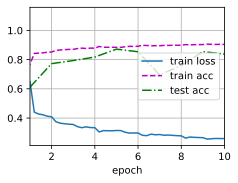

In [19]:
lr, num_epochs, batch_size = 1.0, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [20]:
net[1].gamma.reshape((-1,)), net[1].beta.reshape((-1,))

(tensor([1.2302, 3.1918, 0.7713, 0.5994, 2.6663, 1.3918], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>),
 tensor([-1.1206, -3.4657,  0.0216,  0.0945, -0.1887, -0.0817], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>))

In [22]:
net = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6),
                    nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16),
                    nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(), nn.Linear(256, 120), nn.BatchNorm1d(120),
                    nn.Sigmoid(), nn.Linear(120, 84), nn.BatchNorm1d(84),
                    nn.Sigmoid(), nn.Linear(84, 10))

loss 0.243, train acc 0.909, test acc 0.864
60712.9 examples/sec on cuda:0


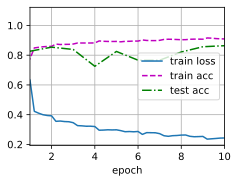

In [23]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# ResNet

In [24]:
class Residual(nn.Module):  
    def __init__(self, input_channels, num_channels, use_1x1conv=False,
                 strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size=3,
                               padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3,
                               padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [25]:
blk = Residual(3, 3)
X = torch.rand(4, 3, 6, 6)
Y = blk(X)
Y.shape

torch.Size([4, 3, 6, 6])

In [26]:
blk = Residual(3, 6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [27]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(
                Residual(input_channels, num_channels, use_1x1conv=True,
                         strides=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))

net = nn.Sequential(b1, b2, b3, b4, b5, nn.AdaptiveAvgPool2d((1, 1)),
                    nn.Flatten(), nn.Linear(512, 10))

In [28]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


loss 0.013, train acc 0.997, test acc 0.918
2896.5 examples/sec on cuda:0


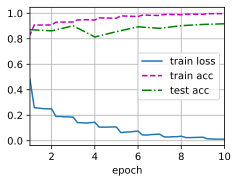

In [29]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# 图片增广

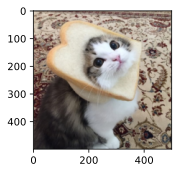

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

d2l.set_figsize()
img=d2l.Image.open("D:/CodeLibrary/img/cat.jpg")
d2l.plt.imshow(img)

In [4]:
def apply(img,aug,num_rows=2,num_cols=4,scale=1.5):
    y=[aug(img) for _ in range(num_rows*num_cols)]
    d2l.show_images(y,num_rows,num_cols,scale=scale)

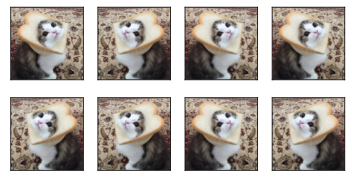

In [5]:
apply(img,torchvision.transforms.RandomHorizontalFlip())

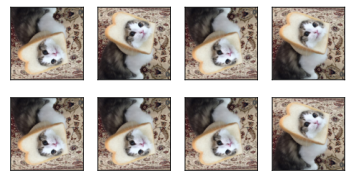

In [6]:
apply(img,torchvision.transforms.RandomVerticalFlip())

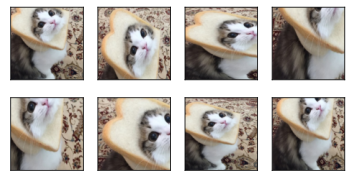

In [7]:
shape_aug=torchvision.transforms.RandomResizedCrop(
    (200,200),scale=(0.1,1),ratio=(0.5,2)
)
apply(img,shape_aug)

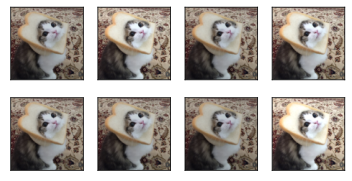

In [8]:
apply(img,torchvision.transforms.ColorJitter(
    brightness=0.5,contrast=0,saturation=0,hue=0
))

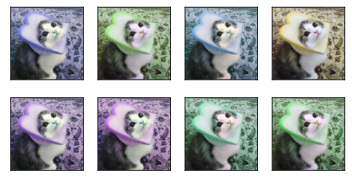

In [9]:
apply(img,torchvision.transforms.ColorJitter(
    brightness=0,contrast=0,saturation=0,hue=0.5
))

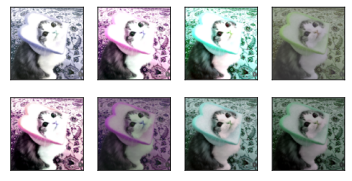

In [10]:
apply(img,torchvision.transforms.ColorJitter(
    brightness=.5,contrast=0.5,saturation=0.5,hue=0.5
))

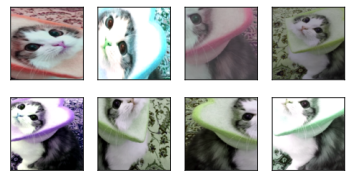

In [11]:
augs=torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5,
                                               saturation=0.5, hue=0.5),
                                               shape_aug]
)
apply(img,augs)

100.0%


Extracting ../data\cifar-10-python.tar.gz to ../data


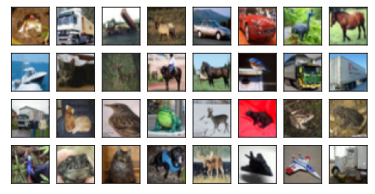

In [14]:
all_imges=torchvision.datasets.CIFAR10(
    train=True,root='../data',download=True
)
d2l.show_images([all_imges[i][0] for i in range(32)], 4, 8, scale=0.8);

In [15]:
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])

In [16]:
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root="../data", train=is_train,
                                           transform=augs, download=True)
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=is_train,
        num_workers=d2l.get_dataloader_workers())
    return dataloader

In [17]:
def train_batch_ch13(net, X, y, loss, trainer, devices):
    if isinstance(X, list):
        X = [x.to(devices[0]) for x in X]
    else:
        X = X.to(devices[0])
    y = y.to(devices[0])
    net.train()
    trainer.zero_grad()
    pred = net(X)
    l = loss(pred, y)
    l.sum().backward()
    trainer.step()
    train_loss_sum = l.sum()
    train_acc_sum = d2l.accuracy(pred, y)
    return train_loss_sum, train_acc_sum

def train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
               devices=d2l.try_all_gpus()):
    timer, num_batches = d2l.Timer(), len(train_iter)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1],
                            legend=['train loss', 'train acc', 'test acc'])
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch_ch13(net, features, labels, loss, trainer,
                                      devices)
            metric.add(l, acc, labels.shape[0], labels.numel())
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(
                    epoch + (i + 1) / num_batches,
                    (metric[0] / metric[2], metric[1] / metric[3], None))
        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc '
          f'{metric[1] / metric[3]:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')

In [18]:
batch_size, devices, net = 256, d2l.try_all_gpus(), d2l.resnet18(10, 3)

def init_weights(m):
    if type(m) in [nn.Linear, nn.Conv2d]:
        nn.init.xavier_uniform_(m.weight)

net.apply(init_weights)

def train_with_data_aug(train_augs, test_augs, net, lr=0.001):
    train_iter = load_cifar10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    loss = nn.CrossEntropyLoss(reduction="none")
    trainer = torch.optim.Adam(net.parameters(), lr=lr)
    train_ch13(net, train_iter, test_iter, loss, trainer, 10, devices)

loss 0.173, train acc 0.939, test acc 0.831
1554.5 examples/sec on [device(type='cuda', index=0)]


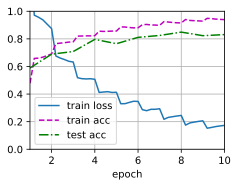

In [19]:
train_with_data_aug(train_augs, test_augs, net)

# 微调

In [20]:
%matplotlib inline
import os
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [21]:
d2l.DATA_HUB['hotdog'] = (d2l.DATA_URL + 'hotdog.zip',
                          'fba480ffa8aa7e0febbb511d181409f899b9baa5')

data_dir = d2l.download_extract('hotdog')

train_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'))
test_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'test'))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

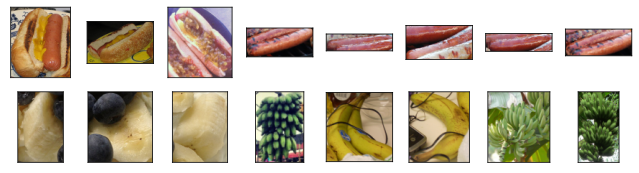

In [22]:
hotdogs = [train_imgs[i][0] for i in range(8)]
not_hotdogs = [train_imgs[-i - 1][0] for i in range(8)]
d2l.show_images(hotdogs + not_hotdogs, 2, 8, scale=1.4)

In [23]:
normalize = torchvision.transforms.Normalize([0.485, 0.456, 0.406],
                                             [0.229, 0.224, 0.225])

train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(), normalize])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(), normalize])

In [27]:
#pretrained=True代表不仅将模型的定义下载下来，还将在IMageNet上训练好的参数下载下来
pretrained_net = torchvision.models.resnet18(pretrained=True)

pretrained_net.fc


Linear(in_features=512, out_features=1000, bias=True)

In [28]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 2)
nn.init.xavier_uniform_(finetune_net.fc.weight);
#只对最后一层的权重做初始化

In [29]:
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5,
                      param_group=True):
    train_iter = torch.utils.data.DataLoader(
        torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                         transform=train_augs),
        batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(
        torchvision.datasets.ImageFolder(os.path.join(data_dir, 'test'),
                                         transform=test_augs),
        batch_size=batch_size)
    devices = d2l.try_all_gpus()
    loss = nn.CrossEntropyLoss(reduction="none")
    if param_group:
        params_1x = [
            param for name, param in net.named_parameters()
            if name not in ["fc.weight", "fc.bias"]]
        trainer = torch.optim.SGD([{
            'params': params_1x}, {
                'params': net.fc.parameters(),
                'lr': learning_rate * 10}], lr=learning_rate,
                                  weight_decay=0.001)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                  weight_decay=0.001)
    d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
                   devices)

loss 0.250, train acc 0.917, test acc 0.945
552.5 examples/sec on [device(type='cuda', index=0)]


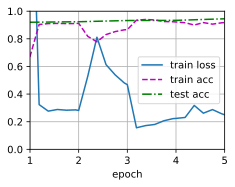

In [26]:
train_fine_tuning(finetune_net, 5e-5)

loss 0.391, train acc 0.834, test acc 0.853
544.2 examples/sec on [device(type='cuda', index=0)]


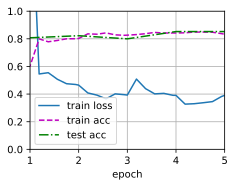

In [30]:
#对比
scratch_net = torchvision.models.resnet18()
scratch_net.fc = nn.Linear(scratch_net.fc.in_features, 2)
train_fine_tuning(scratch_net, 5e-4, param_group=False)

In [31]:
for param in finetune_net.parameters():
    param.requires_grad = False

weight = pretrained_net.fc.weight
hotdog_w = torch.split(weight.data, 1, dim=0)[713]
hotdog_w.shape

torch.Size([1, 512])

# 图像分类

In [2]:
import collections
import math
import os
import shutil
import pandas as pd
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [3]:
#前 1000 个训练图像和 5 个随机测试图像的数据集的小规模样本
d2l.DATA_HUB['cifar10_tiny'] = (d2l.DATA_URL + 'kaggle_cifar10_tiny.zip',
                                '2068874e4b9a9f0fb07ebe0ad2b29754449ccacd')

demo = True

if demo:
    data_dir = d2l.download_extract('cifar10_tiny')
else:  
    data_dir = './data/cifar-10/'

In [4]:
def read_csv_labels(fname):
    with open(fname,'r') as f:
        lines=f.readlines()[1:]
    tokens=[l.rstrip().split(',') for l in lines]
    return dict(((name,label) for name,label in tokens))

labels=read_csv_labels(os.path.join(data_dir,'trainLabels.csv'))
labels

{'1': 'frog',
 '2': 'truck',
 '3': 'truck',
 '4': 'deer',
 '5': 'automobile',
 '6': 'automobile',
 '7': 'bird',
 '8': 'horse',
 '9': 'ship',
 '10': 'cat',
 '11': 'deer',
 '12': 'horse',
 '13': 'horse',
 '14': 'bird',
 '15': 'truck',
 '16': 'truck',
 '17': 'truck',
 '18': 'cat',
 '19': 'bird',
 '20': 'frog',
 '21': 'deer',
 '22': 'cat',
 '23': 'frog',
 '24': 'frog',
 '25': 'bird',
 '26': 'frog',
 '27': 'cat',
 '28': 'dog',
 '29': 'deer',
 '30': 'airplane',
 '31': 'airplane',
 '32': 'truck',
 '33': 'automobile',
 '34': 'cat',
 '35': 'deer',
 '36': 'airplane',
 '37': 'cat',
 '38': 'horse',
 '39': 'cat',
 '40': 'cat',
 '41': 'dog',
 '42': 'bird',
 '43': 'bird',
 '44': 'horse',
 '45': 'automobile',
 '46': 'automobile',
 '47': 'automobile',
 '48': 'bird',
 '49': 'bird',
 '50': 'airplane',
 '51': 'truck',
 '52': 'dog',
 '53': 'horse',
 '54': 'truck',
 '55': 'bird',
 '56': 'bird',
 '57': 'dog',
 '58': 'bird',
 '59': 'deer',
 '60': 'cat',
 '61': 'automobile',
 '62': 'automobile',
 '63': 'ship',

In [5]:
#将验证集从原始的训练集中拆分出来
def copyfile(filename,target_dir):
    os.makedirs(target_dir,exist_ok=True)
    shutil.copy(filename,target_dir)

def reorg_train_valid(data_dir, labels, valid_ratio):
    n = collections.Counter(labels.values()).most_common()[-1][1]
    n_valid_per_label = max(1, math.floor(n * valid_ratio))
    label_count = {}
    for train_file in os.listdir(os.path.join(data_dir, 'train')):
        label = labels[train_file.split('.')[0]]
        fname = os.path.join(data_dir, 'train', train_file)
        copyfile(
            fname,
            os.path.join(data_dir, 'train_valid_test', 'train_valid', label))
        if label not in label_count or label_count[label] < n_valid_per_label:
            copyfile(
                fname,
                os.path.join(data_dir, 'train_valid_test', 'valid', label))
            label_count[label] = label_count.get(label, 0) + 1
        else:
            copyfile(
                fname,
                os.path.join(data_dir, 'train_valid_test', 'train', label))
    return n_valid_per_label

In [6]:
#在预测期间整理测试集，以方便读取
def reorg_test(data_dir):
    for test_file in os.listdir(os.path.join(data_dir, 'test')):
        copyfile(
            os.path.join(data_dir, 'test', test_file),
            os.path.join(data_dir, 'train_valid_test', 'test', 'unknown'))

In [7]:
def reorg_cifar10_data(data_dir, valid_ratio):
    labels = read_csv_labels(os.path.join(data_dir, 'trainLabels.csv'))
    reorg_train_valid(data_dir, labels, valid_ratio)
    reorg_test(data_dir)

batch_size = 32 if demo else 128
valid_ratio = 0.1
reorg_cifar10_data(data_dir, valid_ratio)


In [8]:
#图像增广
transform_train = torchvision.transforms.Compose([
    torchvision.transforms.Resize(40),
    torchvision.transforms.RandomResizedCrop(32, scale=(0.64, 1.0),
                                             ratio=(1.0, 1.0)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                     [0.2023, 0.1994, 0.2010])])

transform_test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                     [0.2023, 0.1994, 0.2010])])

In [9]:
#读取由原始图像组成的数据集
train_ds, train_valid_ds = [
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'train_valid_test', folder),
        transform=transform_train) for folder in ['train', 'train_valid']]

valid_ds, test_ds = [
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'train_valid_test', folder),
        transform=transform_test) for folder in ['valid', 'test']]

In [10]:
#指定上面定义的所有图像增广操作
train_iter, train_valid_iter = [
    torch.utils.data.DataLoader(dataset, batch_size, shuffle=True,
                                drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [11]:
#模型   
def get_net():
    num_classes = 10
    net = d2l.resnet18(num_classes, 3)
    return net

loss = nn.CrossEntropyLoss(reduction="none")

In [12]:
#训练函数
def train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
          lr_decay):
    trainer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9,
                              weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.StepLR(trainer, lr_period, lr_decay)
    num_batches, timer = len(train_iter), d2l.Timer()
    legend = ['train loss', 'train acc']
    if valid_iter is not None:
        legend.append('valid acc')
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=legend)
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        net.train()
        metric = d2l.Accumulator(3)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = d2l.train_batch_ch13(net, features, labels, loss,
                                          trainer, devices)
            metric.add(l, acc, labels.shape[0])
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(
                    epoch + (i + 1) / num_batches,
                    (metric[0] / metric[2], metric[1] / metric[2], None))
        if valid_iter is not None:
            valid_acc = d2l.evaluate_accuracy_gpu(net, valid_iter)
            animator.add(epoch + 1, (None, None, valid_acc))
        scheduler.step()
    measures = (f'train loss {metric[0] / metric[2]:.3f}, '
                f'train acc {metric[1] / metric[2]:.3f}')
    if valid_iter is not None:
        measures += f', valid acc {valid_acc:.3f}'
    print(measures + f'\n{metric[2] * num_epochs / timer.sum():.1f}'
          f' examples/sec on {str(devices)}')

train loss 0.660, train acc 0.761, valid acc 0.312
858.4 examples/sec on [device(type='cuda', index=0)]


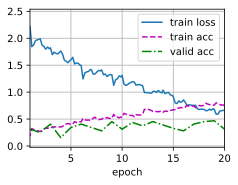

In [13]:
#训练和验证模型
devices, num_epochs, lr, wd = d2l.try_all_gpus(), 20, 2e-4, 5e-4
lr_period, lr_decay, net = 4, 0.9, get_net()
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
      lr_decay)

train loss 0.561, train acc 0.815
1102.2 examples/sec on [device(type='cuda', index=0)]


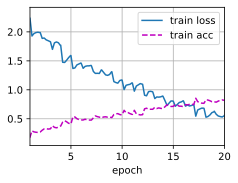

In [14]:
net, preds = get_net(), []
train(net, train_valid_iter, None, num_epochs, lr, wd, devices, lr_period,
      lr_decay)

for X, _ in test_iter:
    y_hat = net(X.to(devices[0]))
    preds.extend(y_hat.argmax(dim=1).type(torch.int32).cpu().numpy())
sorted_ids = list(range(1, len(test_ds) + 1))
sorted_ids.sort(key=lambda x: str(x))
df = pd.DataFrame({'id': sorted_ids, 'label': preds})
df['label'] = df['label'].apply(lambda x: train_valid_ds.classes[x])
df.to_csv('submission.csv', index=False)

# 狗的品种识别

In [1]:
import collections
import math
import os
import shutil
import pandas as pd
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [2]:
d2l.DATA_HUB['dog_tiny'] = (d2l.DATA_URL + 'kaggle_dog_tiny.zip',
                            '0cb91d09b814ecdc07b50f31f8dcad3e81d6a86d')

demo = True
if demo:
    data_dir = d2l.download_extract('dog_tiny')
else:
    data_dir = os.path.join('..', 'data', 'dog-breed-identification')

In [3]:
#整理数据集
def reorg_dog_data(data_dir, valid_ratio):
    labels = d2l.read_csv_labels(os.path.join(data_dir, 'labels.csv'))
    d2l.reorg_train_valid(data_dir, labels, valid_ratio)
    d2l.reorg_test(data_dir)

batch_size = 32 if demo else 128
valid_ratio = 0.1
reorg_dog_data(data_dir, valid_ratio)

In [4]:
#图像增广
transform_train = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224, scale=(0.08, 1.0),
                                             ratio=(3.0 / 4.0, 4.0 / 3.0)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4,
                                       saturation=0.4),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])])

transform_test = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])])

In [5]:
#读取数据集
train_ds, train_valid_ds = [
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'train_valid_test', folder),
        transform=transform_train) for folder in ['train', 'train_valid']]

valid_ds, test_ds = [
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'train_valid_test', folder),
        transform=transform_test) for folder in ['valid', 'test']]

train_iter, train_valid_iter = [
    torch.utils.data.DataLoader(dataset, batch_size, shuffle=True,
                                drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [6]:
#微调预训练模型
def get_net(devices):
    finetune_net = nn.Sequential()
    finetune_net.features = torchvision.models.resnet34(
        pretrained=True 
        )
    finetune_net.output_new = nn.Sequential(nn.Linear(1000, 256), nn.ReLU(),
                                            nn.Linear(256, 120))
    finetune_net = finetune_net.to(devices[0])
    for param in finetune_net.features.parameters():
        param.requires_grad = False
    return finetune_net

In [7]:
#计算损失
loss = nn.CrossEntropyLoss(reduction='none')

def evaluate_loss(data_iter, net, devices):
    l_sum, n = 0.0, 0
    for features, labels in data_iter:
        features, labels = features.to(devices[0]), labels.to(devices[0])
        outputs = net(features)
        l = loss(outputs, labels)
        l_sum += l.sum()
        n += labels.numel()
    return l_sum / n

In [12]:
def train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
          lr_decay):
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    trainer = torch.optim.SGD(
        (param for param in net.parameters() if param.requires_grad), lr=lr,
        momentum=0.9, weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.StepLR(trainer, lr_period, lr_decay)
    num_batches, timer = len(train_iter), d2l.Timer()
    legend = ['train loss']
    if valid_iter is not None:
        legend.append('valid loss')
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=legend)
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(2)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            features, labels = features.to(devices[0]), labels.to(devices[0])
            trainer.zero_grad()
            output = net(features)
            l = loss(output, labels).sum()
            l.backward()
            trainer.step()
            metric.add(l, labels.shape[0])
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[1], None))
        measures = f'train loss {metric[0] / metric[1]:.3f}'
        if valid_iter is not None:
            valid_loss = evaluate_loss(valid_iter, net, devices)
            animator.add(epoch + 1, (None, valid_loss.cpu().detach()))
        scheduler.step()
    if valid_iter is not None:
        measures += f', valid loss {valid_loss:.3f}'
    print(measures + f'\n{metric[1] * num_epochs / timer.sum():.1f}'
          f' examples/sec on {str(devices)}')

train loss 1.050, valid loss 1.561
659.3 examples/sec on [device(type='cuda', index=0)]


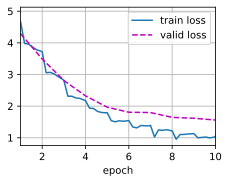

In [13]:
#训练，模型
devices, num_epochs, lr, wd = d2l.try_all_gpus(), 10, 1e-4, 1e-4
lr_period, lr_decay, net = 2, 0.9, get_net(devices)
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
      lr_decay)

train loss 1.103
529.4 examples/sec on [device(type='cuda', index=0)]


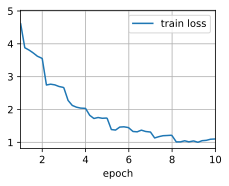

In [14]:
net = get_net(devices)
train(net, train_valid_iter, None, num_epochs, lr, wd, devices, lr_period,
      lr_decay)

preds = []
for data, label in test_iter:
    output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=0)
    preds.extend(output.cpu().detach().numpy())
ids = sorted(
    os.listdir(os.path.join(data_dir, 'train_valid_test', 'test', 'unknown')))
with open('submission.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(
            i.split('.')[0] + ',' + ','.join([str(num)
                                              for num in output]) + '\n')

# 边缘框实现

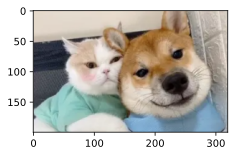

In [18]:
%matplotlib inline
import torch
from d2l import torch as d2l

d2l.set_figsize()
img = d2l.plt.imread('D:/CodeLibrary/img/catdog.jpg')
d2l.plt.imshow(img);

In [20]:
def box_corner_to_center(boxes):
    x1,y1,x2,y2=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    cx=(x1+x2)/2
    cy=(y1+y2)/2
    w=x2-x1
    h=y2-y1
    boxws=torch.stack((cx,cy,w,h),axis=-1)
    return boxes

def box_center_to_corner(boxes):
    cx,cy,w,h=boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    x1=cx-0.5*w
    y1=cy-0.5*h
    x2=cx+0.5*w
    y2=cy+0.5*h
    boxws=torch.stack((x1,y1,x2,y2),axis=-1)
    return boxes


In [25]:
cat_bbox,dog_bbox=[45.0,45.0,150,130],[150,50,300,170]

boxes=torch.tensor((dog_bbox,cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

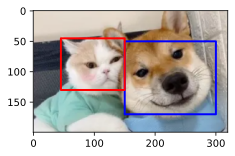

In [26]:
def bbox_to_rect(bbox, color):
    return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0],
                             height=bbox[3] - bbox[1], fill=False,
                             edgecolor=color, linewidth=2)

fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

In [27]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l

d2l.DATA_HUB['banana-detection'] = (
    d2l.DATA_URL + 'banana-detection.zip',
    '5de26c8fce5ccdea9f91267273464dc968d20d72')

In [28]:
def read_data_bananas(is_train=True):
    """读取香蕉检测数据集中的图像和标签。"""
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir,
                             'bananas_train' if is_train else 'bananas_val',
                             'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name')
    images, targets = [], []
    for img_name, target in csv_data.iterrows():
        images.append(
            torchvision.io.read_image(
                os.path.join(data_dir,
                             'bananas_train' if is_train else 'bananas_val',
                             'images', f'{img_name}')))
        targets.append(list(target))
    return images, torch.tensor(targets).unsqueeze(1) / 256

In [29]:
class BananasDataset(torch.utils.data.Dataset):
    """一个用于加载香蕉检测数据集的自定义数据集。"""
    def __init__(self, is_train):
        self.features, self.labels = read_data_bananas(is_train)
        print('read ' + str(len(self.features)) + (
            f' training examples' if is_train else f' validation examples'))

    def __getitem__(self, idx):
        return (self.features[idx].float(), self.labels[idx])

    def __len__(self):
        return len(self.features)

In [30]:
def load_data_bananas(batch_size):
    """加载香蕉检测数据集。"""
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True),
                                             batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False),
                                           batch_size)
    return train_iter, val_iter

In [31]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
batch[0].shape, batch[1].shape

read 1000 training examples
read 100 validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

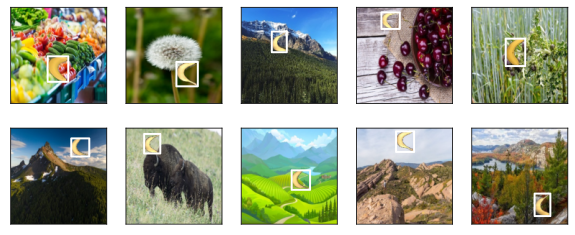

In [32]:
imgs = (batch[0][0:10].permute(0, 2, 3, 1)) / 255
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])

# 锚框

In [33]:
%matplotlib inline
import torch
from d2l import torch as d2l

torch.set_printoptions(2)

In [34]:
def multibox_prior(data, sizes, ratios):
    """生成以每个像素为中心具有不同形状的锚框。"""
    in_height, in_width = data.shape[-2:]
    device, num_sizes, num_ratios = data.device, len(sizes), len(ratios)
    boxes_per_pixel = (num_sizes + num_ratios - 1)
    size_tensor = torch.tensor(sizes, device=device)
    ratio_tensor = torch.tensor(ratios, device=device)

    offset_h, offset_w = 0.5, 0.5
    steps_h = 1.0 / in_height
    steps_w = 1.0 / in_width

    center_h = (torch.arange(in_height, device=device) + offset_h) * steps_h
    center_w = (torch.arange(in_width, device=device) + offset_w) * steps_w
    shift_y, shift_x = torch.meshgrid(center_h, center_w)
    shift_y, shift_x = shift_y.reshape(-1), shift_x.reshape(-1)

    w = torch.cat((size_tensor * torch.sqrt(ratio_tensor[0]),
                   sizes[0] * torch.sqrt(ratio_tensor[1:])))\
                   * in_height / in_width
    h = torch.cat((size_tensor / torch.sqrt(ratio_tensor[0]),
                   sizes[0] / torch.sqrt(ratio_tensor[1:])))
    anchor_manipulations = torch.stack(
        (-w, -h, w, h)).T.repeat(in_height * in_width, 1) / 2

    out_grid = torch.stack([shift_x, shift_y, shift_x, shift_y],
                           dim=1).repeat_interleave(boxes_per_pixel, dim=0)
    output = out_grid + anchor_manipulations
    return output.unsqueeze(0)

In [36]:
img = d2l.plt.imread('D:/CodeLibrary/img/catdog.jpg')
h, w = img.shape[:2]

print(h, w)
X = torch.rand(size=(1, 3, h, w))
Y = multibox_prior(X, sizes=[0.75, 0.5, 0.25], ratios=[1, 2, 0.5])
Y.shape

200 320


D:\Anaconda3\envs\d2l-zh\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 320000, 4])

In [38]:
boxes = Y.reshape(h, w, 5, 4)
boxes[100, 160, 0, :]

tensor([0.27, 0.13, 0.74, 0.88])

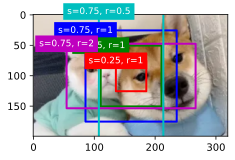

In [40]:
def show_bboxes(axes, bboxes, labels=None, colors=None):
    """显示所有边界框。"""
    def _make_list(obj, default_values=None):
        if obj is None:
            obj = default_values
        elif not isinstance(obj, (list, tuple)):
            obj = [obj]
        return obj

    labels = _make_list(labels)
    colors = _make_list(colors, ['b', 'g', 'r', 'm', 'c'])
    for i, bbox in enumerate(bboxes):
        color = colors[i % len(colors)]
        rect = d2l.bbox_to_rect(bbox.detach().numpy(), color)
        axes.add_patch(rect)
        if labels and len(labels) > i:
            text_color = 'k' if color == 'w' else 'w'
            axes.text(rect.xy[0], rect.xy[1], labels[i], va='center',
                      ha='center', fontsize=9, color=text_color,
                      bbox=dict(facecolor=color, lw=0))

d2l.set_figsize()
bbox_scale = torch.tensor((w, h, w, h))
fig = d2l.plt.imshow(img)
show_bboxes(fig.axes, boxes[100, 160, :, :] * bbox_scale, [
    's=0.75, r=1', 's=0.5, r=1', 's=0.25, r=1', 's=0.75, r=2', 's=0.75, r=0.5'
])

In [41]:
def box_iou(boxes1, boxes2):
    """计算两个锚框或边界框列表中成对的交并比。"""
    box_area = lambda boxes: ((boxes[:, 2] - boxes[:, 0]) *
                              (boxes[:, 3] - boxes[:, 1]))
    areas1 = box_area(boxes1)
    areas2 = box_area(boxes2)
    inter_upperlefts = torch.max(boxes1[:, None, :2], boxes2[:, :2])
    inter_lowerrights = torch.min(boxes1[:, None, 2:], boxes2[:, 2:])
    inters = (inter_lowerrights - inter_upperlefts).clamp(min=0)
    inter_areas = inters[:, :, 0] * inters[:, :, 1]
    union_areas = areas1[:, None] + areas2 - inter_areas
    return inter_areas / union_areas

In [42]:
def assign_anchor_to_bbox(ground_truth, anchors, device, iou_threshold=0.5):
    """将最接近的真实边界框分配给锚框。"""
    num_anchors, num_gt_boxes = anchors.shape[0], ground_truth.shape[0]
    jaccard = box_iou(anchors, ground_truth)
    anchors_bbox_map = torch.full((num_anchors,), -1, dtype=torch.long,
                                  device=device)
    max_ious, indices = torch.max(jaccard, dim=1)
    anc_i = torch.nonzero(max_ious >= 0.5).reshape(-1)
    box_j = indices[max_ious >= 0.5]
    anchors_bbox_map[anc_i] = box_j
    col_discard = torch.full((num_anchors,), -1)
    row_discard = torch.full((num_gt_boxes,), -1)
    for _ in range(num_gt_boxes):
        max_idx = torch.argmax(jaccard)
        box_idx = (max_idx % num_gt_boxes).long()
        anc_idx = (max_idx / num_gt_boxes).long()
        anchors_bbox_map[anc_idx] = box_idx
        jaccard[:, box_idx] = col_discard
        jaccard[anc_idx, :] = row_discard
    return anchors_bbox_map

In [43]:
def offset_boxes(anchors, assigned_bb, eps=1e-6):
    """对锚框偏移量的转换。"""
    c_anc = d2l.box_corner_to_center(anchors)
    c_assigned_bb = d2l.box_corner_to_center(assigned_bb)
    offset_xy = 10 * (c_assigned_bb[:, :2] - c_anc[:, :2]) / c_anc[:, 2:]
    offset_wh = 5 * torch.log(eps + c_assigned_bb[:, 2:] / c_anc[:, 2:])
    offset = torch.cat([offset_xy, offset_wh], axis=1)
    return offset

In [44]:
def multibox_target(anchors, labels):
    """使用真实边界框标记锚框。"""
    batch_size, anchors = labels.shape[0], anchors.squeeze(0)
    batch_offset, batch_mask, batch_class_labels = [], [], []
    device, num_anchors = anchors.device, anchors.shape[0]
    for i in range(batch_size):
        label = labels[i, :, :]
        anchors_bbox_map = assign_anchor_to_bbox(label[:, 1:], anchors,
                                                 device)
        bbox_mask = ((anchors_bbox_map >= 0).float().unsqueeze(-1)).repeat(
            1, 4)
        class_labels = torch.zeros(num_anchors, dtype=torch.long,
                                   device=device)
        assigned_bb = torch.zeros((num_anchors, 4), dtype=torch.float32,
                                  device=device)
        indices_true = torch.nonzero(anchors_bbox_map >= 0)
        bb_idx = anchors_bbox_map[indices_true]
        class_labels[indices_true] = label[bb_idx, 0].long() + 1
        assigned_bb[indices_true] = label[bb_idx, 1:]
        offset = offset_boxes(anchors, assigned_bb) * bbox_mask
        batch_offset.append(offset.reshape(-1))
        batch_mask.append(bbox_mask.reshape(-1))
        batch_class_labels.append(class_labels)
    bbox_offset = torch.stack(batch_offset)
    bbox_mask = torch.stack(batch_mask)
    class_labels = torch.stack(batch_class_labels)
    return (bbox_offset, bbox_mask, class_labels)

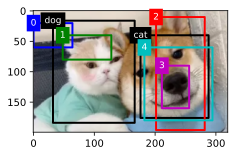

In [45]:
ground_truth = torch.tensor([[0, 0.1, 0.08, 0.52, 0.92],
                             [1, 0.55, 0.2, 0.9, 0.88]])
anchors = torch.tensor([[0, 0.1, 0.2, 0.3], [0.15, 0.2, 0.4, 0.4],
                        [0.63, 0.05, 0.88, 0.98], [0.66, 0.45, 0.8, 0.8],
                        [0.57, 0.3, 0.92, 0.9]])

fig = d2l.plt.imshow(img)
show_bboxes(fig.axes, ground_truth[:, 1:] * bbox_scale, ['dog', 'cat'], 'k')
show_bboxes(fig.axes, anchors * bbox_scale, ['0', '1', '2', '3', '4']);

In [46]:
labels = multibox_target(anchors.unsqueeze(dim=0),
                         ground_truth.unsqueeze(dim=0))

labels[2]

tensor([[0, 1, 2, 0, 2]])

In [47]:
labels[1]

tensor([[0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
         1., 1.]])

In [48]:
labels[0]

tensor([[-0.00e+00, -0.00e+00, -0.00e+00, -0.00e+00,  1.40e+00,  1.00e+01,
          2.59e+00,  7.18e+00, -1.20e+00,  2.69e-01,  1.68e+00, -1.57e+00,
         -0.00e+00, -0.00e+00, -0.00e+00, -0.00e+00, -5.71e-01, -1.00e+00,
          4.17e-06,  6.26e-01]])

In [49]:
def offset_inverse(anchors, offset_preds):
    """根据带有预测偏移量的锚框来预测边界框。"""
    anc = d2l.box_corner_to_center(anchors)
    pred_bbox_xy = (offset_preds[:, :2] * anc[:, 2:] / 10) + anc[:, :2]
    pred_bbox_wh = torch.exp(offset_preds[:, 2:] / 5) * anc[:, 2:]
    pred_bbox = torch.cat((pred_bbox_xy, pred_bbox_wh), axis=1)
    predicted_bbox = d2l.box_center_to_corner(pred_bbox)
    return predicted_bbox

In [50]:
def nms(boxes, scores, iou_threshold):
    """对预测边界框的置信度进行排序。"""
    B = torch.argsort(scores, dim=-1, descending=True)
    keep = []
    while B.numel() > 0:
        i = B[0]
        keep.append(i)
        if B.numel() == 1: break
        iou = box_iou(boxes[i, :].reshape(-1, 4),
                      boxes[B[1:], :].reshape(-1, 4)).reshape(-1)
        inds = torch.nonzero(iou <= iou_threshold).reshape(-1)
        B = B[inds + 1]
    return torch.tensor(keep, device=boxes.device)

In [51]:
def multibox_detection(cls_probs, offset_preds, anchors, nms_threshold=0.5,
                       pos_threshold=0.009999999):
    """使用非极大值抑制来预测边界框。"""
    device, batch_size = cls_probs.device, cls_probs.shape[0]
    anchors = anchors.squeeze(0)
    num_classes, num_anchors = cls_probs.shape[1], cls_probs.shape[2]
    out = []
    for i in range(batch_size):
        cls_prob, offset_pred = cls_probs[i], offset_preds[i].reshape(-1, 4)
        conf, class_id = torch.max(cls_prob[1:], 0)
        predicted_bb = offset_inverse(anchors, offset_pred)
        keep = nms(predicted_bb, conf, nms_threshold)

        all_idx = torch.arange(num_anchors, dtype=torch.long, device=device)
        combined = torch.cat((keep, all_idx))
        uniques, counts = combined.unique(return_counts=True)
        non_keep = uniques[counts == 1]
        all_id_sorted = torch.cat((keep, non_keep))
        class_id[non_keep] = -1
        class_id = class_id[all_id_sorted]
        conf, predicted_bb = conf[all_id_sorted], predicted_bb[all_id_sorted]
        below_min_idx = (conf < pos_threshold)
        class_id[below_min_idx] = -1
        conf[below_min_idx] = 1 - conf[below_min_idx]
        pred_info = torch.cat(
            (class_id.unsqueeze(1), conf.unsqueeze(1), predicted_bb), dim=1)
        out.append(pred_info)
    return torch.stack(out)

In [52]:
anchors = torch.tensor([[0.1, 0.08, 0.52, 0.92], [0.08, 0.2, 0.56, 0.95],
                        [0.15, 0.3, 0.62, 0.91], [0.55, 0.2, 0.9, 0.88]])
offset_preds = torch.tensor([0] * anchors.numel())
cls_probs = torch.tensor([[0] * 4,
                          [0.9, 0.8, 0.7, 0.1],
                          [0.1, 0.2, 0.3, 0.9]])

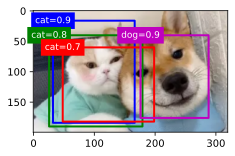

In [56]:
fig = d2l.plt.imshow(img)
show_bboxes(fig.axes, anchors * bbox_scale,
            ['cat=0.9', 'cat=0.8', 'cat=0.7', 'dog=0.9'])

In [54]:
output = multibox_detection(cls_probs.unsqueeze(dim=0),
                            offset_preds.unsqueeze(dim=0),
                            anchors.unsqueeze(dim=0), nms_threshold=0.5)
output

tensor([[[ 0.00,  0.90,  0.10,  0.08,  0.52,  0.92],
         [ 1.00,  0.90,  0.55,  0.20,  0.90,  0.88],
         [-1.00,  0.80,  0.08,  0.20,  0.56,  0.95],
         [-1.00,  0.70,  0.15,  0.30,  0.62,  0.91]]])

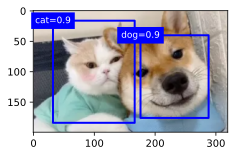

In [57]:
fig = d2l.plt.imshow(img)
for i in output[0].detach().numpy():
    if i[0] == -1:
        continue
    label = ('cat=', 'dog=')[int(i[0])] + str(i[1])
    show_bboxes(fig.axes, [torch.tensor(i[2:]) * bbox_scale], label)

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

img=d2l.plt.imread('D:/CodeLibrary/img/catdog.jpg')
h,w=img.shape[:2]
h,w

(561, 728)

In [3]:
#在特征图上生成锚框，每个单位像素作为锚框的中心
def display_anchors(fmap_w,fmap_h,s):
    d2l.set_figsize()
    fmap=torch.zeros((1,10,fmap_h,fmap_w))
    anchors=d2l.multibox_prior(fmap,sizes=s,ratios=[1, 2, 0.5])
    bbox_scale=torch.tensor((w,h,w,h))
    d2l.show_bboxes(d2l.plt.imshow(img).axes, anchors[0] * bbox_scale)

D:\Anaconda3\envs\d2l-zh\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


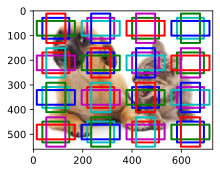

In [4]:
#探测小目标
display_anchors(fmap_w=4,fmap_h=4,s=[0.15])

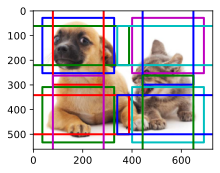

In [6]:
#特征图高宽减半，使用较大的锚框来检测较大的目标
display_anchors(fmap_w=2,fmap_h=2,s=[0.4])

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [2]:
#SSD
def cls_predictor(num_inputs,num_anchors,num_classes):
    return nn.Conv2d(num_inputs,num_anchors*(num_classes+1),kernel_size=3,padding=1)
    

In [3]:
#边界框预测
def bbox_predictor(num_inputs,num_anchors):
    return nn.Conv2d(
        num_inputs,num_anchors*4,kernel_size=3,padding=1
    )

In [4]:
#连接多尺度的预测
def forward(x,block):
    return block(x)

Y1 = forward(torch.zeros((2, 8, 20, 20)), cls_predictor(8, 5, 10))
Y2 = forward(torch.zeros((2, 16, 10, 10)), cls_predictor(16, 3, 10))
Y1.shape, Y2.shape

(torch.Size([2, 55, 20, 20]), torch.Size([2, 33, 10, 10]))

In [5]:
def flatten_pred(pred):
    return torch.flatten(pred.permute(0, 2, 3, 1), start_dim=1)

def concat_preds(preds):
    return torch.cat([flatten_pred(p) for p in preds], dim=1)

concat_preds([Y1, Y2]).shape

torch.Size([2, 25300])

In [6]:
#高宽减半块
def down_sample_blk(in_channels, out_channels):
    blk = []
    for _ in range(2):
        blk.append(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        blk.append(nn.BatchNorm2d(out_channels))
        blk.append(nn.ReLU())
        in_channels = out_channels
    blk.append(nn.MaxPool2d(2))
    return nn.Sequential(*blk)

forward(torch.zeros((2, 3, 20, 20)), down_sample_blk(3, 10)).shape

torch.Size([2, 10, 10, 10])

In [7]:
#基本网络块
def base_net():
    blk = []
    num_filters = [3, 16, 32, 64]
    for i in range(len(num_filters) - 1):
        blk.append(down_sample_blk(num_filters[i], num_filters[i + 1]))
    return nn.Sequential(*blk)

forward(torch.zeros((2, 3, 256, 256)), base_net()).shape

torch.Size([2, 64, 32, 32])

In [8]:
#完整的单发多框检测模型由五个模块组成
def get_blk(i):
    if i == 0:
        blk = base_net()
    elif i == 1:
        blk = down_sample_blk(64, 128)
    elif i == 4:
        blk = nn.AdaptiveMaxPool2d((1, 1))
    else:
        blk = down_sample_blk(128, 128)
    return blk

In [9]:
#定义块前向计算
def blk_forward(X, blk, size, ratio, cls_predictor, bbox_predictor):
    Y = blk(X)
    anchors = d2l.multibox_prior(Y, sizes=size, ratios=ratio)
    cls_preds = cls_predictor(Y)
    bbox_preds = bbox_predictor(Y)
    return (Y, anchors, cls_preds, bbox_preds)

In [10]:
sizes = [[0.2, 0.272], [0.37, 0.447], [0.54, 0.619], [0.71, 0.79],
         [0.88, 0.961]]
ratios = [[1, 2, 0.5]] * 5
num_anchors = len(sizes[0]) + len(ratios[0]) - 1

In [11]:
#定义函数
class TinySSD(nn.Module):
    def __init__(self, num_classes, **kwargs):
        super(TinySSD, self).__init__(**kwargs)
        self.num_classes = num_classes
        idx_to_in_channels = [64, 128, 128, 128, 128]
        for i in range(5):
            setattr(self, f'blk_{i}', get_blk(i))
            setattr(
                self, f'cls_{i}',
                cls_predictor(idx_to_in_channels[i], num_anchors,
                              num_classes))
            setattr(self, f'bbox_{i}',
                    bbox_predictor(idx_to_in_channels[i], num_anchors))

    def forward(self, X):
        anchors, cls_preds, bbox_preds = [None] * 5, [None] * 5, [None] * 5
        for i in range(5):
            X, anchors[i], cls_preds[i], bbox_preds[i] = blk_forward(
                X, getattr(self, f'blk_{i}'), sizes[i], ratios[i],
                getattr(self, f'cls_{i}'), getattr(self, f'bbox_{i}'))
        anchors = torch.cat(anchors, dim=1)
        cls_preds = concat_preds(cls_preds)
        cls_preds = cls_preds.reshape(cls_preds.shape[0], -1,
                                      self.num_classes + 1)
        bbox_preds = concat_preds(bbox_preds)
        return anchors, cls_preds, bbox_preds

In [12]:
#创建一个模型实例，执行前向计算
net=TinySSD(num_classes=1)
X = torch.zeros((32, 3, 256, 256))
anchors, cls_preds, bbox_preds = net(X)

print('output anchors:', anchors.shape)
print('output class preds:', cls_preds.shape)
print('output bbox preds:', bbox_preds.shape)

output anchors: torch.Size([1, 5444, 4])
output class preds: torch.Size([32, 5444, 2])
output bbox preds: torch.Size([32, 21776])


D:\Anaconda3\envs\d2l-zh\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [13]:
#读取香蕉数据集
batch_size=32
train_iter,_=d2l.load_data_bananas(batch_size)

read 1000 training examples
read 100 validation examples


In [14]:
#初始化参数并定义优化算法
device, net = d2l.try_gpu(), TinySSD(num_classes=1)
trainer = torch.optim.SGD(net.parameters(), lr=0.2, weight_decay=5e-4)

In [15]:
#定义损失函数和评价函数
cls_loss=nn.CrossEntropyLoss(reduction='none')
bbox_loss=nn.L1Loss(reduction='none')

def calc_loss(cls_preds, cls_labels, bbox_preds, bbox_labels, bbox_masks):
    batch_size, num_classes = cls_preds.shape[0], cls_preds.shape[2]
    cls = cls_loss(cls_preds.reshape(-1, num_classes),
                   cls_labels.reshape(-1)).reshape(batch_size, -1).mean(dim=1)
    bbox = bbox_loss(bbox_preds * bbox_masks,
                     bbox_labels * bbox_masks).mean(dim=1)
    return cls + bbox

def cls_eval(cls_preds, cls_labels):
    return float(
        (cls_preds.argmax(dim=-1).type(cls_labels.dtype) == cls_labels).sum())

def bbox_eval(bbox_preds, bbox_labels, bbox_masks):
    return float((torch.abs((bbox_labels - bbox_preds) * bbox_masks)).sum())

class err 3.32e-03, bbox mae 3.18e-03
10855.6 examples/sec on cuda:0


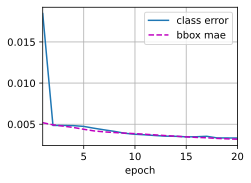

In [16]:
num_epochs, timer = 20, d2l.Timer()
animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                        legend=['class error', 'bbox mae'])
net = net.to(device)
for epoch in range(num_epochs):
    metric = d2l.Accumulator(4)
    net.train()
    for features, target in train_iter:
        timer.start()
        trainer.zero_grad()
        X, Y = features.to(device), target.to(device)
        anchors, cls_preds, bbox_preds = net(X)
        bbox_labels, bbox_masks, cls_labels = d2l.multibox_target(anchors, Y)
        l = calc_loss(cls_preds, cls_labels, bbox_preds, bbox_labels,
                      bbox_masks)
        l.mean().backward()
        trainer.step()
        metric.add(cls_eval(cls_preds, cls_labels), cls_labels.numel(),
                   bbox_eval(bbox_preds, bbox_labels, bbox_masks),
                   bbox_labels.numel())
    cls_err, bbox_mae = 1 - metric[0] / metric[1], metric[2] / metric[3]
    animator.add(epoch + 1, (cls_err, bbox_mae))
print(f'class err {cls_err:.2e}, bbox mae {bbox_mae:.2e}')
print(f'{len(train_iter.dataset) / timer.stop():.1f} examples/sec on '
      f'{str(device)}')

In [20]:
#预测目标
X = torchvision.io.read_image('D:/CodeLibrary/img/banana.jpg').unsqueeze(0).float()
img = X.squeeze(0).permute(1, 2, 0).long()

def predict(X):
    net.eval()
    anchors, cls_preds, bbox_preds = net(X.to(device))
    cls_probs = F.softmax(cls_preds, dim=2).permute(0, 2, 1)
    output = d2l.multibox_detection(cls_probs, bbox_preds, anchors)
    idx = [i for i, row in enumerate(output[0]) if row[0] != -1]
    return output[0, idx]

output = predict(X)

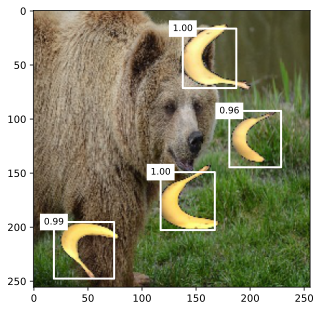

In [21]:
def display(img, output, threshold):
    d2l.set_figsize((5, 5))
    fig = d2l.plt.imshow(img)
    for row in output:
        score = float(row[1])
        if score < threshold:
            continue
        h, w = img.shape[0:2]
        bbox = [row[2:6] * torch.tensor((w, h, w, h), device=row.device)]
        d2l.show_bboxes(fig.axes, bbox, '%.2f' % score, 'w')

display(img, output.cpu(), threshold=0.9)

In [1]:
#语义分割数据集
%matplotlib inline
import os
import torch
import torchvision
from d2l import torch as d2l

d2l.DATA_HUB['voc2012'] = (d2l.DATA_URL + 'VOCtrainval_11-May-2012.tar',
                           '4e443f8a2eca6b1dac8a6c57641b67dd40621a49')

voc_dir = d2l.download_extract('voc2012', 'VOCdevkit/VOC2012')

In [2]:
#将所有的图像和标签读入内存
def read_voc_images(voc_dir, is_train=True):
    """读取所有VOC图像并标注。"""
    txt_fname = os.path.join(voc_dir, 'ImageSets', 'Segmentation',
                             'train.txt' if is_train else 'val.txt')
    mode = torchvision.io.image.ImageReadMode.RGB
    with open(txt_fname, 'r') as f:
        images = f.read().split()
    features, labels = [], []
    for i, fname in enumerate(images):
        features.append(
            torchvision.io.read_image(
                os.path.join(voc_dir, 'JPEGImages', f'{fname}.jpg')))
        labels.append(
            torchvision.io.read_image(
                os.path.join(voc_dir, 'SegmentationClass', f'{fname}.png'),
                mode))
    return features, labels

train_features, train_labels = read_voc_images(voc_dir, True)

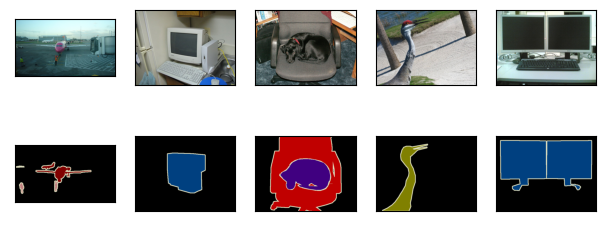

In [3]:
#绘制前五个输入图像及其标签
n = 5
imgs = train_features[0:n] + train_labels[0:n]
imgs = [img.permute(1, 2, 0) for img in imgs]
d2l.show_images(imgs, 2, n);

In [4]:
#列举RGB颜色值和类名
VOC_COLORMAP = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
                [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
                [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
                [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
                [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
                [0, 64, 128]]

VOC_CLASSES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

In [5]:
#查找标签中每个像素的类索引
def voc_colormap2label():
    """构建从RGB到VOC类别索引的映射。"""
    colormap2label = torch.zeros(256**3, dtype=torch.long)
    for i, colormap in enumerate(VOC_COLORMAP):
        colormap2label[(colormap[0] * 256 + colormap[1]) * 256 +
                       colormap[2]] = i
    return colormap2label

def voc_label_indices(colormap, colormap2label):
    """将VOC标签中的RGB值映射到它们的类别索引。"""
    colormap = colormap.permute(1, 2, 0).numpy().astype('int32')
    idx = ((colormap[:, :, 0] * 256 + colormap[:, :, 1]) * 256 +
           colormap[:, :, 2])
    return colormap2label[idx]

In [6]:
y = voc_label_indices(train_labels[0], voc_colormap2label())
y[105:115, 130:140], VOC_CLASSES[1]

(tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]),
 'aeroplane')

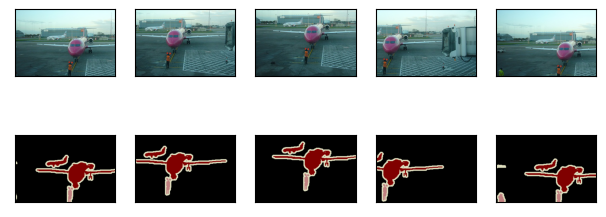

In [7]:
#使用图像增广中的随机裁剪，裁剪输入图像和标签的相同区域
def voc_rand_crop(feature, label, height, width):
    """随机裁剪特征和标签图像。"""
    rect = torchvision.transforms.RandomCrop.get_params(
        feature, (height, width))
    feature = torchvision.transforms.functional.crop(feature, *rect)
    label = torchvision.transforms.functional.crop(label, *rect)
    return feature, label

imgs = []
for _ in range(n):
    imgs += voc_rand_crop(train_features[0], train_labels[0], 200, 300)

imgs = [img.permute(1, 2, 0) for img in imgs]
d2l.show_images(imgs[::2] + imgs[1::2], 2, n);

In [8]:
class VOCSegDataset(torch.utils.data.Dataset):
    """一个用于加载VOC数据集的自定义数据集。"""
    def __init__(self, is_train, crop_size, voc_dir):
        self.transform = torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.crop_size = crop_size
        features, labels = read_voc_images(voc_dir, is_train=is_train)
        self.features = [
            self.normalize_image(feature)
            for feature in self.filter(features)]
        self.labels = self.filter(labels)
        self.colormap2label = voc_colormap2label()
        print('read ' + str(len(self.features)) + ' examples')

    def normalize_image(self, img):
        return self.transform(img.float())

    def filter(self, imgs):
        return [
            img for img in imgs if (img.shape[1] >= self.crop_size[0] and
                                    img.shape[2] >= self.crop_size[1])]

    def __getitem__(self, idx):
        feature, label = voc_rand_crop(self.features[idx], self.labels[idx],
                                       *self.crop_size)
        return (feature, voc_label_indices(label, self.colormap2label))

    def __len__(self):
        return len(self.features)

In [9]:
#读取数据集
crop_size=(320,480)
voc_train=VOCSegDataset(True,crop_size,voc_dir)
voc_test=VOCSegDataset(False,crop_size,voc_dir)

read 1114 examples
read 1078 examples


In [10]:
batch_size = 64
train_iter = torch.utils.data.DataLoader(
    voc_train, batch_size, shuffle=True, drop_last=True,
    num_workers=0)
for X, Y in train_iter:
    print(X.shape)
    print(Y.shape)
    break

torch.Size([64, 3, 320, 480])
torch.Size([64, 320, 480])


In [11]:
#组件整合
def load_data_voc(batch_size, crop_size):
    """加载VOC语义分割数据集。"""
    voc_dir = d2l.download_extract('voc2012',
                                   os.path.join('VOCdevkit', 'VOC2012'))
    num_workers = d2l.get_dataloader_workers()
    train_iter = torch.utils.data.DataLoader(
        VOCSegDataset(True, crop_size, voc_dir), batch_size, shuffle=True,
        drop_last=True, num_workers=num_workers)
    test_iter = torch.utils.data.DataLoader(
        VOCSegDataset(False, crop_size, voc_dir), batch_size, drop_last=True,
        num_workers=num_workers)
    return train_iter, test_iter

In [1]:
#转置卷积
import torch
from d2l import torch as d2l
from torch import nn

In [2]:
#实现基本的转置卷积运算
def trans_conv(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] + h - 1, X.shape[1] + w - 1))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Y[i:i + h, j:j + w] += X[i, j] * K
    return Y

In [3]:
#验证
X = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
trans_conv(X, K)

tensor([[ 0.,  0.,  1.],
        [ 0.,  4.,  6.],
        [ 4., 12.,  9.]])

In [4]:
#使用高级API实现功能
X, K = X.reshape(1, 1, 2, 2), K.reshape(1, 1, 2, 2)
tconv = nn.ConvTranspose2d(1, 1, kernel_size=2, bias=False)
tconv.weight.data = K
tconv(X)

tensor([[[[ 0.,  0.,  1.],
          [ 0.,  4.,  6.],
          [ 4., 12.,  9.]]]], grad_fn=<ConvolutionBackward0>)

In [6]:
#填充步幅多通道
tconv=nn.ConvTranspose2d(1,1,kernel_size=2,padding=1,bias=False)
tconv.weight.data = K
tconv(X)

tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)

In [24]:
tconv = nn.ConvTranspose2d(1, 1, kernel_size=2, stride=2, bias=False)
tconv.weight.data = K
tconv(X)

tensor([[[[0., 0., 0., 1.],
          [0., 0., 2., 3.],
          [0., 2., 0., 3.],
          [4., 6., 6., 9.]]]], grad_fn=<ConvolutionBackward0>)

In [25]:
X = torch.rand(size=(1, 10, 16, 16))
conv = nn.Conv2d(10, 20, kernel_size=5, padding=2, stride=3)
tconv = nn.ConvTranspose2d(20, 10, kernel_size=5, padding=2, stride=3)
tconv(conv(X)).shape == X.shape

True

In [26]:
#与矩阵变换的联系
X = torch.arange(9.0).reshape(3, 3)
K = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
Y = d2l.corr2d(X, K)
Y

tensor([[27., 37.],
        [57., 67.]])

In [27]:
def kernel2matrix(K):
    k, W = torch.zeros(5), torch.zeros((4, 9))
    k[:2], k[3:5] = K[0, :], K[1, :]
    W[0, :5], W[1, 1:6], W[2, 3:8], W[3, 4:] = k, k, k, k
    return W

W = kernel2matrix(K)
W

tensor([[1., 2., 0., 3., 4., 0., 0., 0., 0.],
        [0., 1., 2., 0., 3., 4., 0., 0., 0.],
        [0., 0., 0., 1., 2., 0., 3., 4., 0.],
        [0., 0., 0., 0., 1., 2., 0., 3., 4.]])

In [28]:
Y == torch.matmul(W, X.reshape(-1)).reshape(2, 2)

tensor([[True, True],
        [True, True]])

In [29]:
Z = trans_conv(Y, K)
Z == torch.matmul(W.T, Y.reshape(-1)).reshape(3, 3)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [30]:
#全卷积神经网络
%matplotlib inline
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [31]:
#使用在ImageNet数据集上预训练的ResNet-18模型来提取图像特征
pretrained_net = torchvision.models.resnet18(pretrained=True)
list(pretrained_net.children())[-3:]

D:\Anaconda3\envs\d2l-zh\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Anaconda3\envs\d2l-zh\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (downsample): Sequential(
       (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
       (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (1): BasicBlock(
     (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): Batc

In [32]:
#创建一个全卷积网络实例net
net = nn.Sequential(*list(pretrained_net.children())[:-2])

X = torch.rand(size=(1, 3, 320, 480))
net(X).shape

torch.Size([1, 512, 10, 15])

In [33]:
#使用1×1卷积层将输出通道数转换为Pascal VOC2012数据集的类数（21类）。 将要素地图的高度和宽度增加32倍
num_classes = 21
net.add_module('final_conv', nn.Conv2d(512, num_classes, kernel_size=1))
net.add_module(
    'transpose_conv',
    nn.ConvTranspose2d(num_classes, num_classes, kernel_size=64, padding=16,
                       stride=32))

In [34]:
#初始化转置卷积层
def bilinear_kernel(in_channels, out_channels, kernel_size):
    factor = (kernel_size + 1) // 2
    if kernel_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = (torch.arange(kernel_size).reshape(-1, 1),
          torch.arange(kernel_size).reshape(1, -1))
    filt = (1 - torch.abs(og[0] - center) / factor) * \
           (1 - torch.abs(og[1] - center) / factor)
    weight = torch.zeros(
        (in_channels, out_channels, kernel_size, kernel_size))
    weight[range(in_channels), range(out_channels), :, :] = filt
    return weight

input image shape: torch.Size([561, 728, 3])
output image shape: torch.Size([1122, 1456, 3])


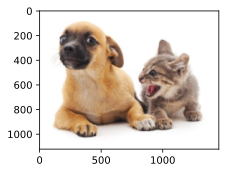

In [35]:
#双线性插值的上采样实验
conv_trans = nn.ConvTranspose2d(3, 3, kernel_size=4, padding=1, stride=2,
                                bias=False)
conv_trans.weight.data.copy_(bilinear_kernel(3, 3, 4));

img = torchvision.transforms.ToTensor()(d2l.Image.open('D:/CodeLibrary/img/catdog.jpg'))
X = img.unsqueeze(0)
Y = conv_trans(X)
out_img = Y[0].permute(1, 2, 0).detach()

d2l.set_figsize()
print('input image shape:', img.permute(1, 2, 0).shape)
d2l.plt.imshow(img.permute(1, 2, 0))
print('output image shape:', out_img.shape)
d2l.plt.imshow(out_img);

In [36]:
#用双线性插值的上采样初始化转置卷积层。对于1×1卷积层，我们使用Xavier初始化参数
W = bilinear_kernel(num_classes, num_classes, 64)
net.transpose_conv.weight.data.copy_(W);

In [37]:
#读取数据集
batch_size, crop_size = 32, (320, 480)
train_iter, test_iter = d2l.load_data_voc(batch_size, crop_size)

read 1114 examples
read 1078 examples


loss 0.411, train acc 0.871, test acc 0.853
112.2 examples/sec on [device(type='cuda', index=0)]


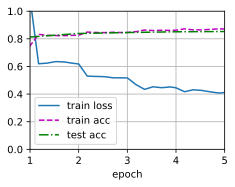

In [38]:
#训练
def loss(inputs, targets):
    return F.cross_entropy(inputs, targets, reduction='none').mean(1).mean(1)

num_epochs, lr, wd, devices = 5, 0.001, 1e-3, d2l.try_all_gpus()
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=wd)
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)

In [39]:
def predict(img):
    X = test_iter.dataset.normalize_image(img).unsqueeze(0)
    pred = net(X.to(devices[0])).argmax(dim=1)
    return pred.reshape(pred.shape[1], pred.shape[2])


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

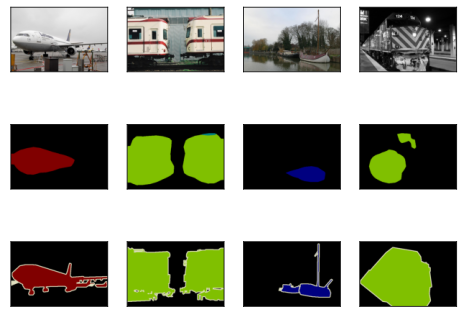

In [40]:
def label2image(pred):
    colormap = torch.tensor(d2l.VOC_COLORMAP, device=devices[0])
    X = pred.long()
    return colormap[X, :]

voc_dir = d2l.download_extract('voc2012', 'VOCdevkit/VOC2012')
test_images, test_labels = d2l.read_voc_images(voc_dir, False)
n, imgs = 4, []
for i in range(n):
    crop_rect = (0, 0, 320, 480)
    X = torchvision.transforms.functional.crop(test_images[i], *crop_rect)
    pred = label2image(predict(X))
    imgs += [
        X.permute(1, 2, 0),
        pred.cpu(),
        torchvision.transforms.functional.crop(test_labels[i],
                                               *crop_rect).permute(1, 2, 0)]
d2l.show_images(imgs[::3] + imgs[1::3] + imgs[2::3], 3, n, scale=2)

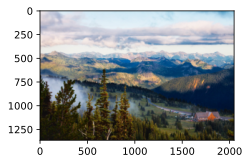

In [41]:
#样式迁移
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

d2l.set_figsize()
content_img = d2l.Image.open('D:/CodeLibrary/img/rainier.jpg')
d2l.plt.imshow(content_img);

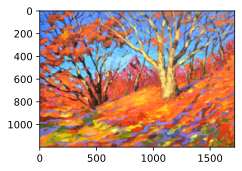

In [42]:
style_img = d2l.Image.open('D:/CodeLibrary/img/autumn-oak.jpg')
d2l.plt.imshow(style_img);

In [43]:
#预处理和后处理
rgb_mean = torch.tensor([0.485, 0.456, 0.406])
rgb_std = torch.tensor([0.229, 0.224, 0.225])

def preprocess(img, image_shape):
    transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize(image_shape),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=rgb_mean, std=rgb_std)])
    return transforms(img).unsqueeze(0)

def postprocess(img):
    img = img[0].to(rgb_std.device)
    img = torch.clamp(img.permute(1, 2, 0) * rgb_std + rgb_mean, 0, 1)
    return torchvision.transforms.ToPILImage()(img.permute(2, 0, 1))

In [44]:
#抽取特征
pretrained_net = torchvision.models.vgg19(pretrained=True)

style_layers, content_layers = [0, 5, 10, 19, 28], [25]

net = nn.Sequential(*[
    pretrained_net.features[i]
    for i in range(max(content_layers + style_layers) + 1)])

def extract_features(X, content_layers, style_layers):
    contents = []
    styles = []
    for i in range(len(net)):
        X = net[i](X)
        if i in style_layers:
            styles.append(X)
        if i in content_layers:
            contents.append(X)
    return contents, styles

def get_contents(image_shape, device):
    content_X = preprocess(content_img, image_shape).to(device)
    contents_Y, _ = extract_features(content_X, content_layers, style_layers)
    return content_X, contents_Y

def get_styles(image_shape, device):
    style_X = preprocess(style_img, image_shape).to(device)
    _, styles_Y = extract_features(style_X, content_layers, style_layers)
    return style_X, styles_Y

D:\Anaconda3\envs\d2l-zh\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Anaconda3\envs\d2l-zh\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\sha/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100.0%


In [45]:
#定义损失函数
def content_loss(Y_hat, Y):
    return torch.square(Y_hat - Y.detach()).mean()

def gram(X):
    num_channels, n = X.shape[1], X.numel() // X.shape[1]
    X = X.reshape((num_channels, n))
    return torch.matmul(X, X.T) / (num_channels * n)

def style_loss(Y_hat, gram_Y):
    return torch.square(gram(Y_hat) - gram_Y.detach()).mean()

def tv_loss(Y_hat):
    return 0.5 * (torch.abs(Y_hat[:, :, 1:, :] - Y_hat[:, :, :-1, :]).mean() +
                  torch.abs(Y_hat[:, :, :, 1:] - Y_hat[:, :, :, :-1]).mean())

In [46]:
#风格转移的损失函数是内容损失、风格损失和总变化损失的加权和
content_weight, style_weight, tv_weight = 1, 1e3, 10

def compute_loss(X, contents_Y_hat, styles_Y_hat, contents_Y, styles_Y_gram):
    contents_l = [
        content_loss(Y_hat, Y) * content_weight
        for Y_hat, Y in zip(contents_Y_hat, contents_Y)]
    styles_l = [
        style_loss(Y_hat, Y) * style_weight
        for Y_hat, Y in zip(styles_Y_hat, styles_Y_gram)]
    tv_l = tv_loss(X) * tv_weight
    l = sum(10 * styles_l + contents_l + [tv_l])
    return contents_l, styles_l, tv_l, l

In [47]:
#初始化合成图像
class SynthesizedImage(nn.Module):
    def __init__(self, img_shape, **kwargs):
        super(SynthesizedImage, self).__init__(**kwargs)
        self.weight = nn.Parameter(torch.rand(*img_shape))

    def forward(self):
        return self.weight

def get_inits(X, device, lr, styles_Y):
    gen_img = SynthesizedImage(X.shape).to(device)
    gen_img.weight.data.copy_(X.data)
    trainer = torch.optim.Adam(gen_img.parameters(), lr=lr)
    styles_Y_gram = [gram(Y) for Y in styles_Y]
    return gen_img(), styles_Y_gram, trainer

In [48]:
def train(X, contents_Y, styles_Y, device, lr, num_epochs, lr_decay_epoch):
    X, styles_Y_gram, trainer = get_inits(X, device, lr, styles_Y)
    scheduler = torch.optim.lr_scheduler.StepLR(trainer, lr_decay_epoch, 0.8)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[10, num_epochs],
                            legend=['content', 'style',
                                    'TV'], ncols=2, figsize=(7, 2.5))
    for epoch in range(num_epochs):
        trainer.zero_grad()
        contents_Y_hat, styles_Y_hat = extract_features(
            X, content_layers, style_layers)
        contents_l, styles_l, tv_l, l = compute_loss(X, contents_Y_hat,
                                                     styles_Y_hat, contents_Y,
                                                     styles_Y_gram)
        l.backward()
        trainer.step()
        scheduler.step()
        if (epoch + 1) % 10 == 0:
            animator.axes[1].imshow(postprocess(X))
            animator.add(
                epoch + 1,
                [float(sum(contents_l)),
                 float(sum(styles_l)),
                 float(tv_l)])
    return X

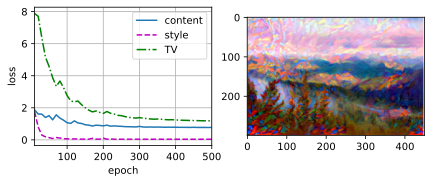

In [49]:
device, image_shape = d2l.try_gpu(), (300, 450)
net = net.to(device)
content_X, contents_Y = get_contents(image_shape, device)
_, styles_Y = get_styles(image_shape, device)
output = train(content_X, contents_Y, styles_Y, device, 0.3, 500, 50)